#Telecom Customer Churn Prediction Model

**Project Background** : The Telecommunications companies faces challenges with customer churn rates higher the 10% annually.**To address this issue, the project aims to develop a classification model to predict customer churn based on individual features.**The goal is to leverage this data to create a predictive model that can help the company identify customers at risk of churning and implement retention strategies effectively.

The data set includes the following variables:
* state: Categorical, for the 51 states and the District of Columbia.
* Area.code
* account.length: how long the account has been active.
* voice.plan: yes or no, voicemail plan.
* voice.messages: number of voicemail messages.
* intl.plan: yes or no, international plan.
* intl.mins: minutes customer used service to make international calls.
* intl.calls: total number of international calls.
* intl.charge: total international charge.
* day.mins: minutes customer used service during the day.
* day.calls: total number of calls during the day.
* day.charge: total charge during the day.
* eve.mins: minutes customer used service during the evening.
* eve.calls: total number of calls during the evening.
* eve.charge: total charge during the evening.
* night.mins: minutes customer used service during the night.
* night.calls: total number of calls during the night.
* night.charge: total charge during the night.
* customer.calls: number of calls to customer service.
* churn(**Target**): Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).


####Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',None)

# 1.Load the dataset

####Load the Raw-data    -> Data integration

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS_P383/Churn (1).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

* The  [day.charge ,eve.mins] columns are numerical values but are in object dtypes.So, we are changing them to { float } dtype  values(NUMERICAL VARIABLES).



#### All Data Types are mentioned correctly.

In [ ]:
column_dict = {"day.charge":float ,"eve.mins" :float}
df=df.astype(column_dict)                         # pd.astype("dict")          ->  returns the new df with changed dtypes

In [ ]:
df.select_dtypes(include='object')                        # Categorical variables

,state,area.code,voice.plan,intl.plan,churn
0,KS,area_code_415,yes,no,no
1,OH,area_code_415,yes,no,no
2,NJ,area_code_415,no,no,no
3,OH,area_code_408,no,yes,no
4,OK,area_code_415,no,yes,no
...,...,...,...,...,...
4995,HI,area_code_408,yes,no,no
4996,WV,area_code_415,no,no,yes
4997,DC,area_code_415,no,no,no
4998,DC,area_code_510,no,no,no


* churn (yes || no) is the target output.

In [ ]:
df.select_dtypes(include=['int64','float64'])             #Numerical variables

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4996,4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4997,4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4998,4999,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


# 2.Data Exploration

####Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,2500.500000,1443.520003,1.0,1250.750,2500.50,3750.25,5000.00
account.length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
voice.messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
intl.mins,5000.0,10.261780,2.761396,0.0,8.500,10.30,12.00,20.00
intl.calls,5000.0,4.435200,2.456788,0.0,3.000,4.00,6.00,20.00
intl.charge,5000.0,2.771196,0.745514,0.0,2.300,2.78,3.24,5.40
day.mins,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
day.calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
day.charge,4993.0,30.653501,9.166356,0.0,24.430,30.62,36.75,59.76
eve.mins,4976.0,200.580326,50.554637,0.0,166.275,201.00,234.10,363.70


In [ ]:
df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,NaN,NaN,NaN,2500.5,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
state,5000,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,5000,3,area_code_415,2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,5000.0,NaN,NaN,NaN,100.2586,39.69456,1.0,73.0,100.0,127.0,243.0
voice.plan,5000,2,no,3677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice.messages,5000.0,NaN,NaN,NaN,7.7552,13.546393,0.0,0.0,0.0,17.0,52.0
intl.plan,5000,2,no,4527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intl.mins,5000.0,NaN,NaN,NaN,10.26178,2.761396,0.0,8.5,10.3,12.0,20.0
intl.calls,5000.0,NaN,NaN,NaN,4.4352,2.456788,0.0,3.0,4.0,6.0,20.0
intl.charge,5000.0,NaN,NaN,NaN,2.771196,0.745514,0.0,2.3,2.78,3.24,5.4


* State has 51 unique values while area_code has 3 unique values . What is the relation ?
* Units for account length ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

* All the columns data types are correctly identified

#### In Data Analysis we will analyze to find out the below stuff
+ Missing values
+ All the Numerical Variables
+ Distribution of the Numerical Variables
+ Categorical Variables
+ Cardinality of Categorical Variables
+ Outliers
+ Relationshop between independent and dependent feature (Target)

In [ ]:
# print shape of dataset with rows and columns
print(df.shape)
# print top 5 records
df.head()

(5000, 21)


,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


####2.1 Missing values

* ***There are no missing values in categorical values***

In [ ]:
df[(df['voice.plan'] == '') | (df['intl.plan'] == '') | (df['churn'] == '') | (df['state'] == '')|(df['area.code'] == '')]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


In [ ]:
df.isnull().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

[ Day.charge , eve.calls ] has missing values.

In [ ]:
(df.isnull().sum()/len(df))*100

Unnamed: 0        0.00
state             0.00
area.code         0.00
account.length    0.00
voice.plan        0.00
voice.messages    0.00
intl.plan         0.00
intl.mins         0.00
intl.calls        0.00
intl.charge       0.00
day.mins          0.00
day.calls         0.00
day.charge        0.14
eve.mins          0.48
eve.calls         0.00
eve.charge        0.00
night.mins        0.00
night.calls       0.00
night.charge      0.00
customer.calls    0.00
churn             0.00
dtype: float64

#### The percentage of missing values in the data is less than 0.5 % of the entire data .

In [ ]:
df.sort_values(by ='day.charge',na_position='first').head(10)                   #sort_values

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
12,13,IA,area_code_408,168,no,0,no,11.2,2,3.02,128.8,96,NaN,104.9,71,8.92,141.1,128,6.35,1,no
27,28,MT,area_code_408,54,no,0,no,14.7,4,3.97,134.3,73,NaN,155.5,100,13.22,102.1,68,4.59,3,no
47,48,DE,area_code_408,142,no,0,no,7.4,5,2.00,187.0,133,NaN,134.6,74,11.44,242.2,127,10.90,2,no
4407,4408,TN,area_code_415,125,no,0,no,7.7,3,2.08,138.5,96,NaN,159.7,117,13.57,212.7,91,9.57,2,no
4755,4756,OK,area_code_408,17,no,0,no,14.8,5,4.00,180.4,121,NaN,228.5,111,19.42,199.5,99,8.98,0,no
4965,4966,NC,area_code_408,92,no,0,no,10.7,2,2.89,192.1,87,NaN,193.0,122,16.41,133.4,79,6.00,1,no
4992,4993,MT,area_code_415,83,no,0,no,10.3,6,2.78,188.3,70,NaN,243.8,88,20.72,213.7,79,9.62,0,no
1397,1398,VT,area_code_510,101,no,0,no,7.2,4,1.94,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,1,no
1345,1346,SD,area_code_415,98,no,0,no,6.8,1,1.84,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,4,yes
2736,2737,OK,area_code_510,127,yes,27,no,9.2,5,2.48,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,3,no


* There are 3 different types of Missing data that can be encountered.
1. MCAR ( Missing Completley At Random ) : The missing data is completly at random and is distributed randomly accross the data range ,not limiting to one specific range and is feature which has missing values not related/can be dependent to another feature .
2. MAR (Missing At Random ) : The missing data is observed randomly on the data and feature which has the dependency to another feature in the data.
3. MNAR (Missing Not At Random ) : The missing data is here , caused by a relationship between missing values of the data and observed values in the data itself.

* The feature day.charge has NULL values and the values are dependent on features day.mins and day.charge .So, it is MAR (Missing at Random )  

In [ ]:
df.sort_values(by ='eve.mins',na_position='first')                              #sort_values

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
89,90,NJ,area_code_415,128,no,0,no,13.9,4,3.75,237.9,125,40.44,NaN,93,21.05,208.9,68,9.40,1,yes
102,103,VT,area_code_415,135,no,0,no,10.5,6,2.84,151.7,82,25.79,NaN,105,10.12,180.0,100,8.10,0,no
110,111,MI,area_code_408,120,no,0,no,8.3,8,2.24,165.0,100,28.05,NaN,83,26.96,119.2,86,5.36,1,no
159,160,FL,area_code_510,115,yes,24,no,9.6,4,2.59,142.1,124,24.16,NaN,129,15.59,164.8,114,7.42,1,no
231,232,OH,area_code_415,63,yes,36,yes,11.0,6,2.97,199.0,110,33.83,NaN,111,24.76,197.6,92,8.89,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,4565,TX,area_code_510,145,no,0,no,6.2,6,1.67,158.8,120,27.00,352.1,145,29.93,177.6,140,7.99,2,no
2551,2552,MD,area_code_415,102,no,0,no,10.9,3,2.94,129.5,56,22.02,354.2,118,30.11,145.5,93,6.55,1,no
4892,4893,IN,area_code_510,63,no,0,no,5.6,3,1.51,6.6,107,1.12,359.3,142,30.54,252.5,131,11.36,0,no
2331,2332,IN,area_code_415,46,yes,34,no,7.2,2,1.94,191.4,102,32.54,361.8,96,30.75,147.5,132,6.64,1,no



* The feature eve.mins has NULL values and the values are dependent on features eve.calls and eve.charge .So, it is MAR (Missing at Random )  

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

* The null values have been dropped .

#### 2.2 Duplicated values

In [ ]:
df[df.duplicated()]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


* There are no duplicates in the data frame.

In [ ]:
df.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

* Feature Engineering prospects :
** day.charge, day.min ,day.calls --->"day charge per min" and "day charge per call"
* Simlarly , for the Eveing , Night ,International categories

In [ ]:
num_cols = df.select_dtypes(include = np.number).columns
num_cols                                                # Numerical feature columns

Index(['Unnamed: 0', 'account.length', 'voice.messages', 'intl.mins',
       'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge',
       'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls',
       'night.charge', 'customer.calls'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include ='object').columns
cat_cols                                                 # Categorical feature columns

Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object')

#### 2.3 Univarite analysis : Analyzing the variables using one feature at a time.

In [ ]:
def outliers (df,ft):
    outlier_dict = {}
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3-Q1

    LOWER_BOUND=Q1-1.5*IQR
    UPPER_BOUND=Q3+1.5*IQR

    ls=df.index[ (df[ft]< LOWER_BOUND) | (df[ft]> UPPER_BOUND) ]
    outlier_dict[ft]=ls
    return outlier_dict


In [ ]:
index_list=[]
for feature in num_cols:
    index_list.append(outliers(df,feature))

In [ ]:
index_list

[{'Unnamed: 0': Index([], dtype='int64')},
 {'account.length': Index([ 238,  309,  416,  817, 1045, 1093, 1387, 1408, 1551, 1751, 1886, 2150,
         2259, 2277, 2700, 3216, 3227, 4260, 4342, 4379, 4389, 4395, 4629, 4798],
        dtype='int64')},
 {'voice.messages': Index([  71,  149,  268,  277,  423,  599,  615,  790,  845,  872, 1269, 1285,
         1378, 1441, 1454, 1487, 1596, 1602, 1732, 1797, 1846, 1908, 2366, 2457,
         2570, 2608, 2686, 2716, 2768, 2887, 3154, 3165, 3174, 3246, 3279, 3342,
         3433, 3523, 3524, 3543, 3577, 3826, 3910, 4059, 4275, 4338, 4369, 4445,
         4502, 4516, 4588, 4625, 4706, 4713, 4717, 4777, 4778, 4824, 4859, 4933],
        dtype='int64')},
 {'intl.mins': Index([ 115,  179,  214,  225,  314,  343,  367,  397,  488,  502,  515,  535,
          595,  712,  762,  878, 1028, 1080, 1257, 1400, 1420, 1564, 1570, 1651,
         1816, 1966, 2004, 2180, 2197, 2229, 2238, 2256, 2345, 2362, 2371, 2513,
         2534, 2669, 2733, 2816, 2906, 2918, 2

In [ ]:
def info(your_dict:dict)->None:
  for feature_name, indices_list in your_dict.items():
    global total_outliers
    total_outliers+=len(indices_list)
    print(f"The fetaure  '{feature_name}' has {len(indices_list)} outliers")

In [ ]:
total_outliers = 0
for outlier_dict in index_list:
  info(outlier_dict)

print(f"The total number of outliers are {total_outliers}")

The fetaure  'Unnamed: 0' has 0 outliers
The fetaure  'account.length' has 24 outliers
The fetaure  'voice.messages' has 60 outliers
The fetaure  'intl.mins' has 71 outliers
The fetaure  'intl.calls' has 118 outliers
The fetaure  'intl.charge' has 71 outliers
The fetaure  'day.mins' has 34 outliers
The fetaure  'day.calls' has 35 outliers
The fetaure  'day.charge' has 34 outliers
The fetaure  'eve.mins' has 43 outliers
The fetaure  'eve.calls' has 34 outliers
The fetaure  'eve.charge' has 42 outliers
The fetaure  'night.mins' has 40 outliers
The fetaure  'night.calls' has 43 outliers
The fetaure  'night.charge' has 39 outliers
The fetaure  'customer.calls' has 398 outliers
The total number of outliers are 1086


In [ ]:
Outliers_percent= (100*total_outliers )/len(df)
Outliers_percent

21.855504125578587

We cannot remove 21 % of data as outliers as we might loose important inforamtion on large scale .


There are too many outliers compared to size of avialble data.SO,At this point we are not removing it.


--------------

--------------

Unnamed: 0
skew :  -0.01


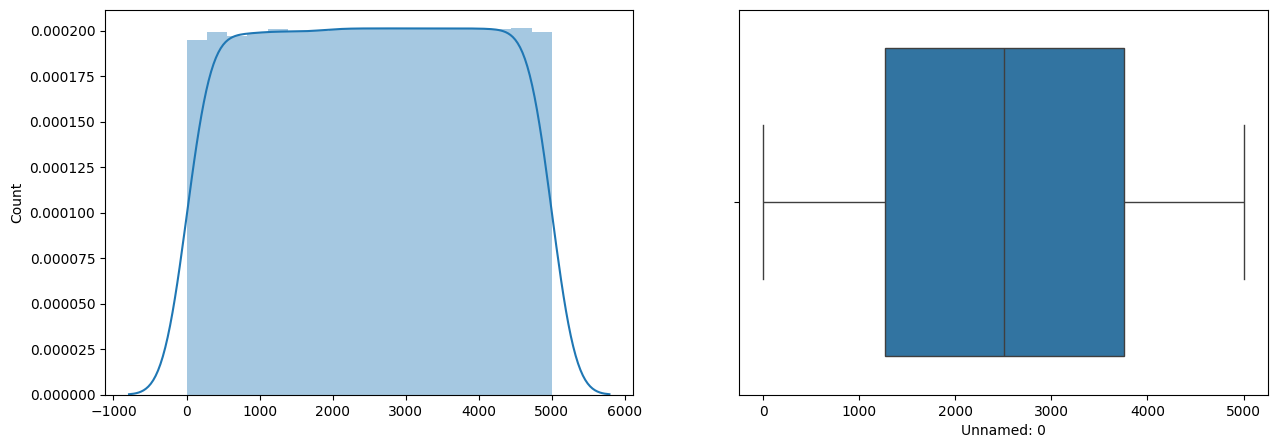

--------------

--------------

account.length
skew :  0.11


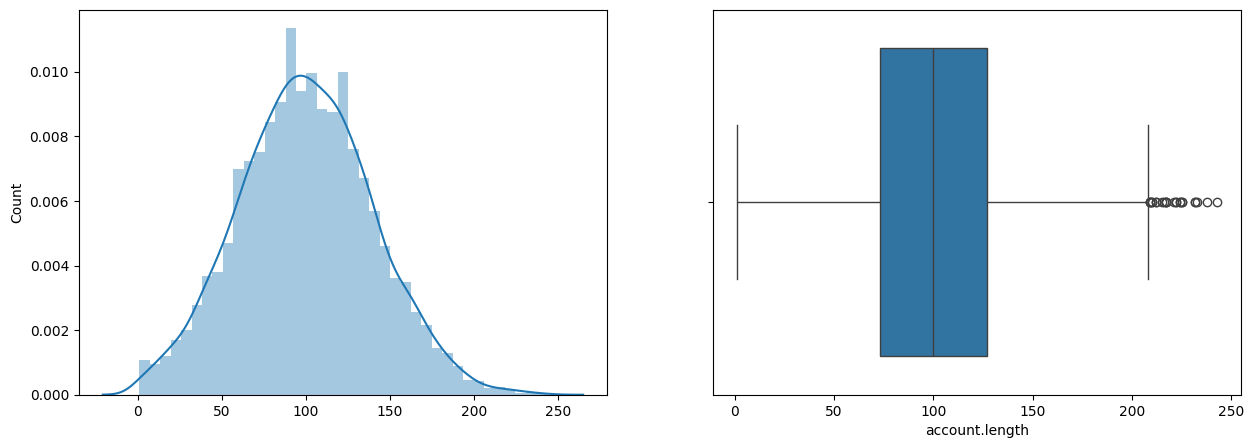

--------------

--------------

voice.messages
skew :  1.35


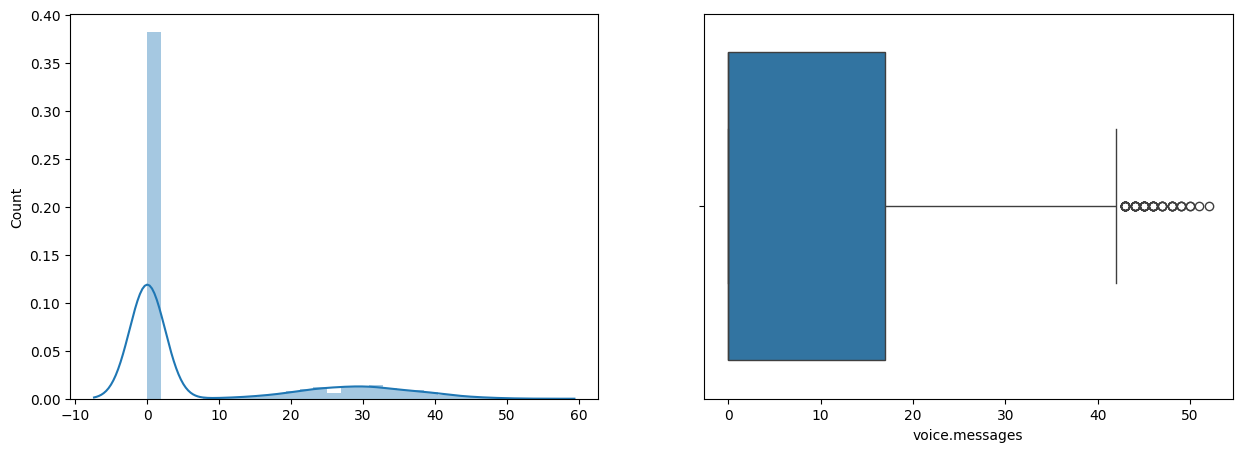

--------------

--------------

intl.mins
skew :  -0.21


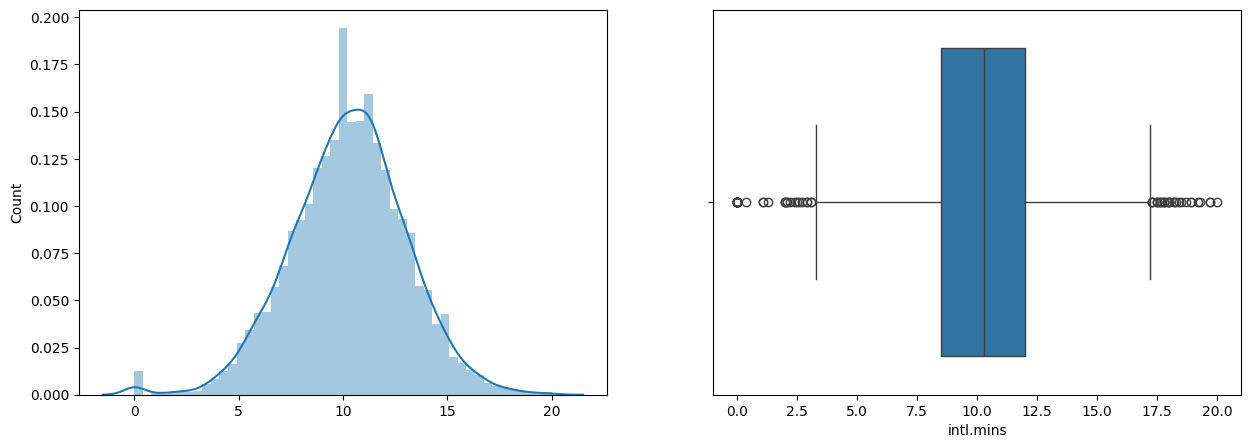

--------------

--------------

intl.calls
skew :  1.36


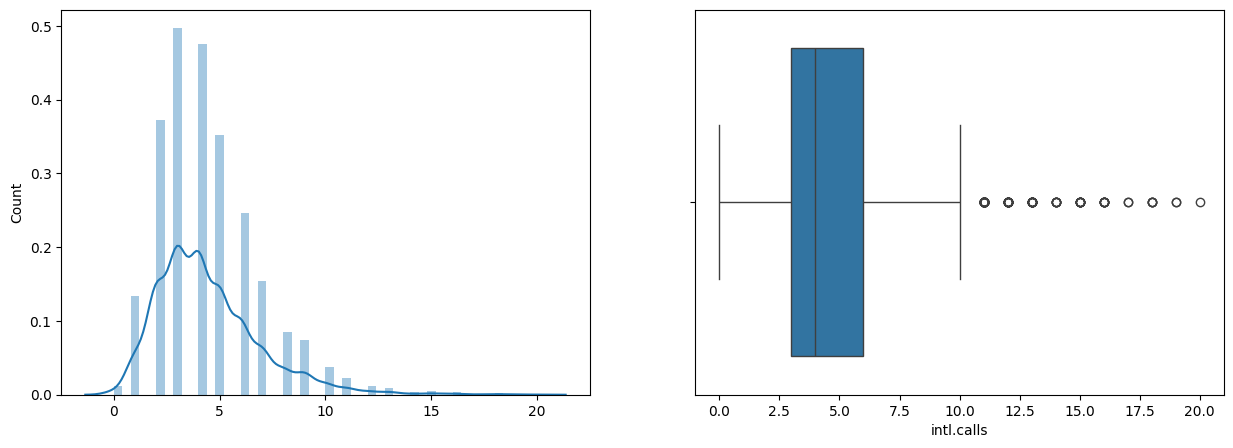

--------------

--------------

intl.charge
skew :  -0.21


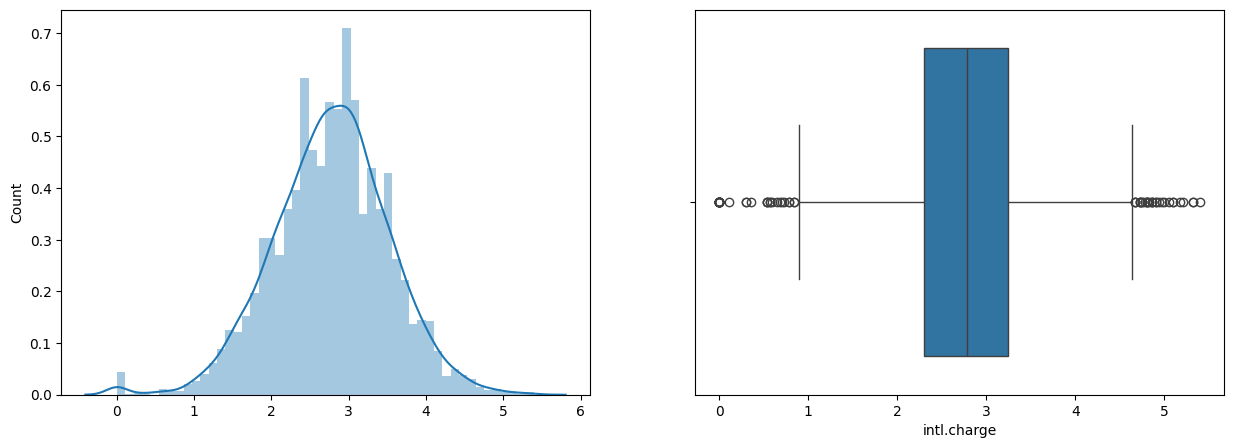

--------------

--------------

day.mins
skew :  -0.01


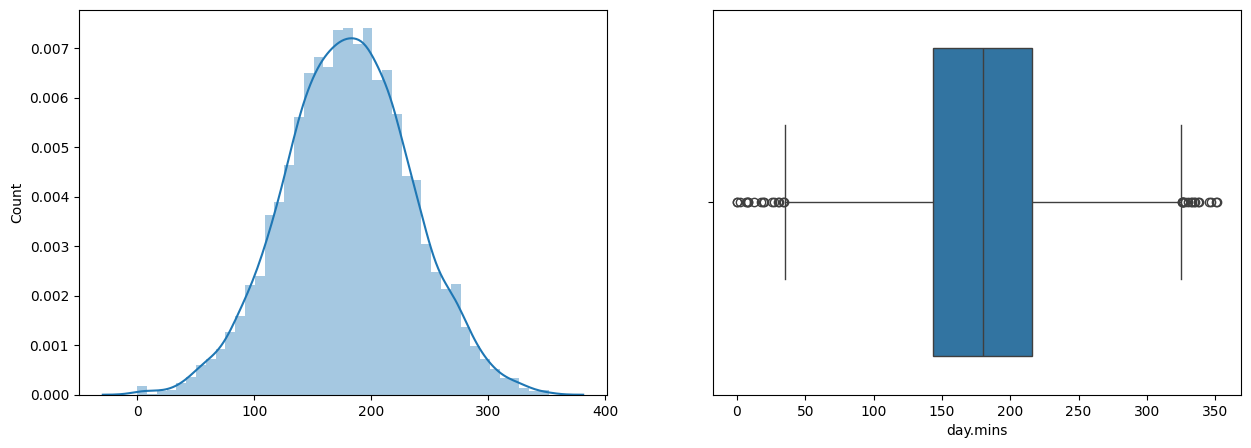

--------------

--------------

day.calls
skew :  -0.09


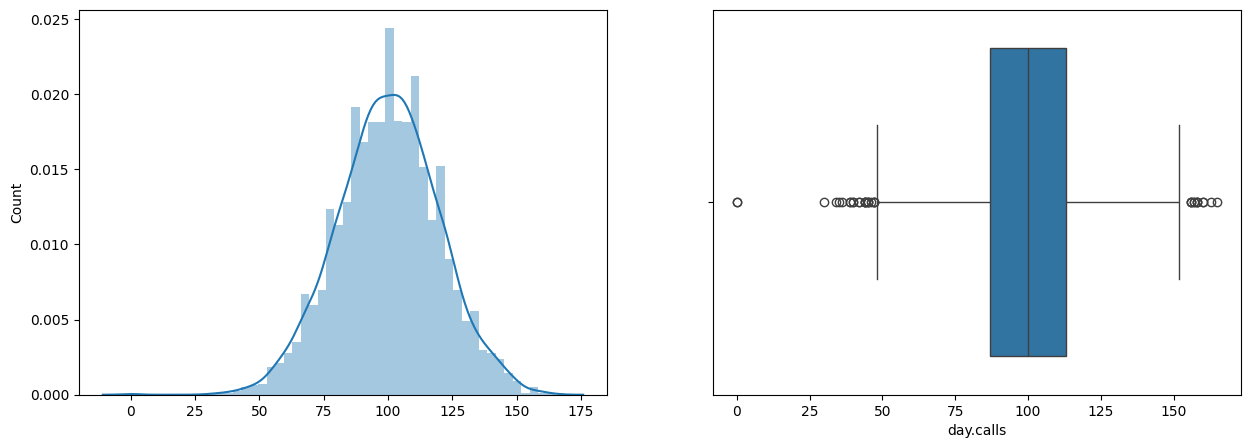

--------------

--------------

day.charge
skew :  -0.01


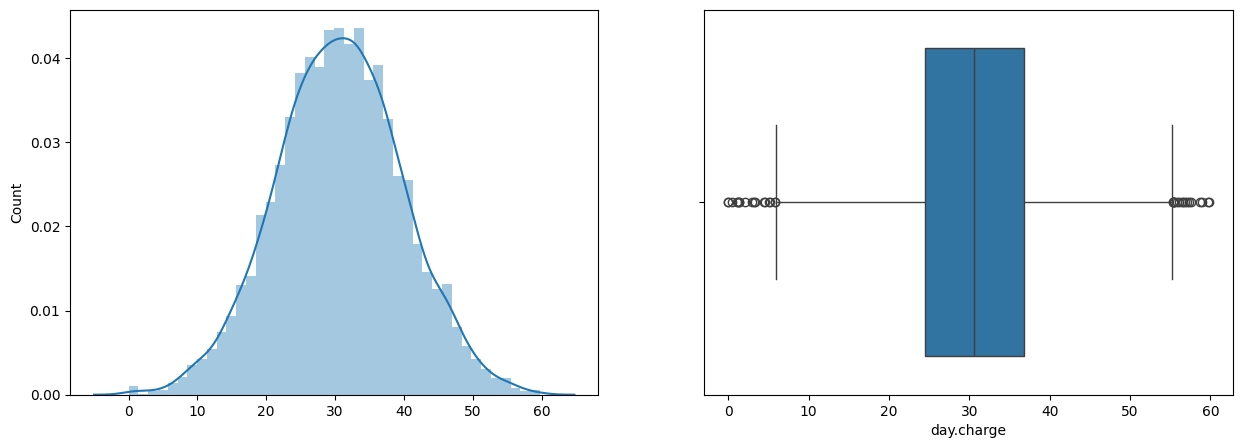

--------------

--------------

eve.mins
skew :  -0.01


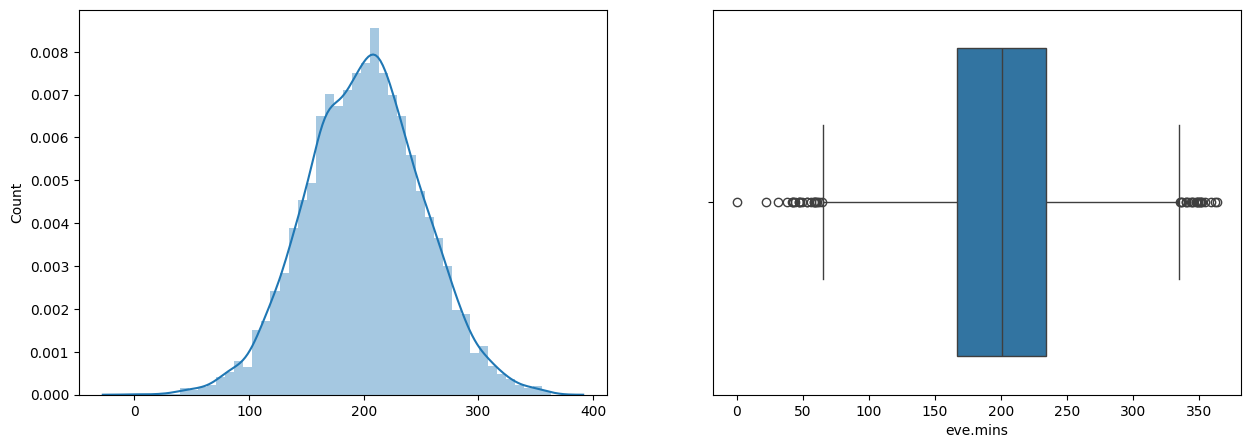

--------------

--------------

eve.calls
skew :  -0.02


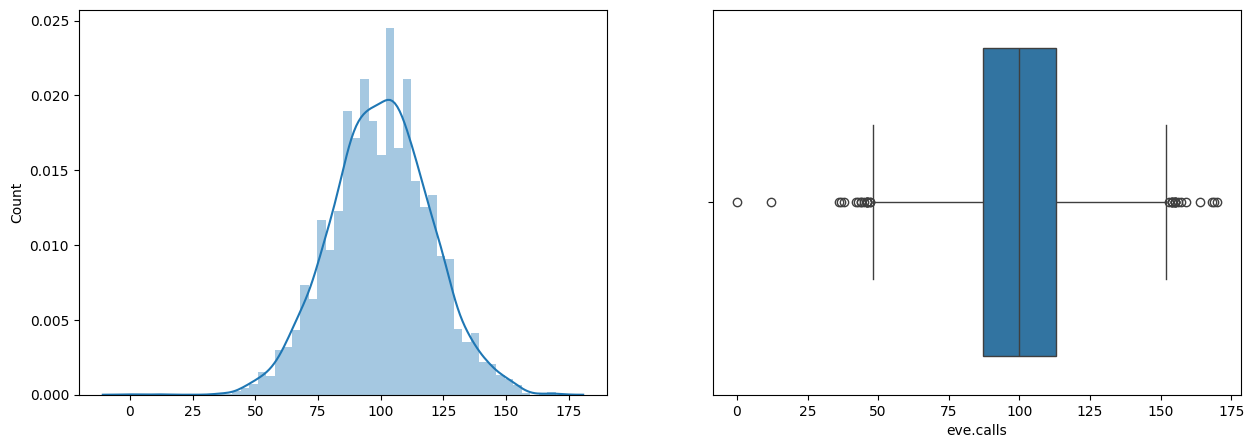

--------------

--------------

eve.charge
skew :  -0.01


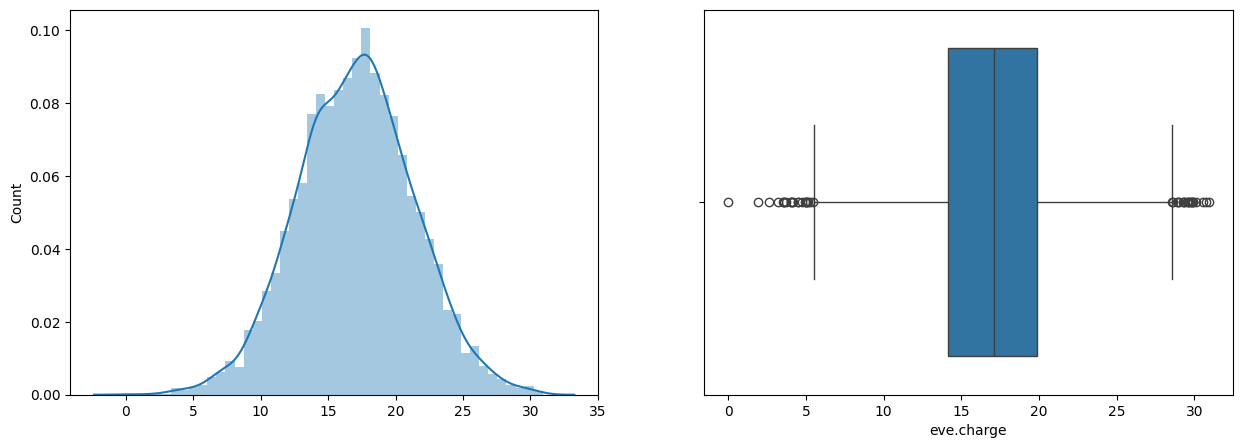

--------------

--------------

night.mins
skew :  0.02


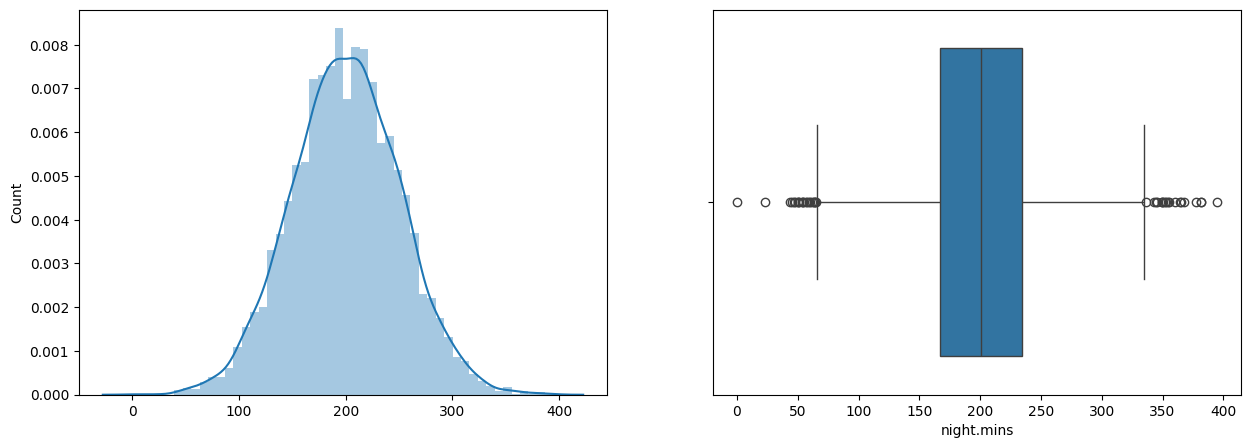

--------------

--------------

night.calls
skew :  0.0


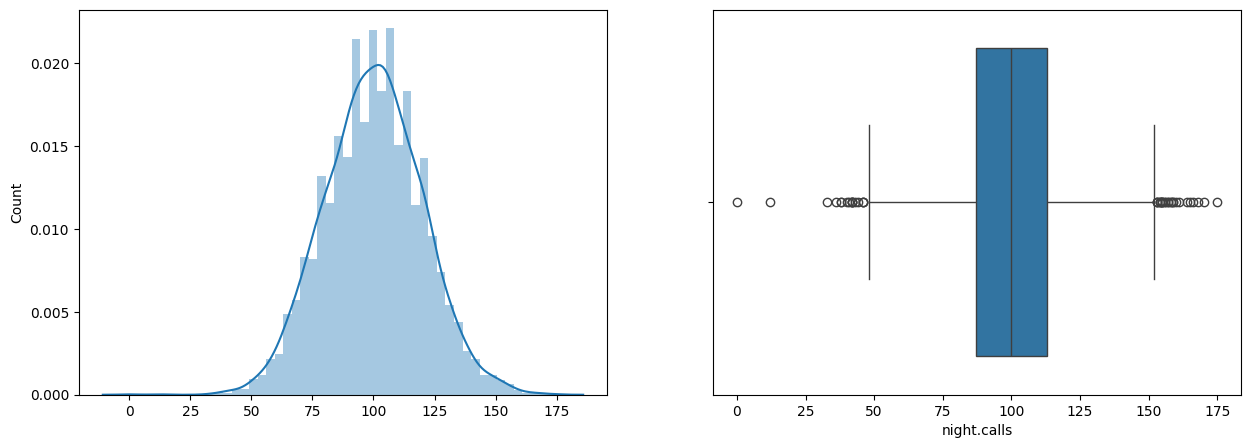

--------------

--------------

night.charge
skew :  0.02


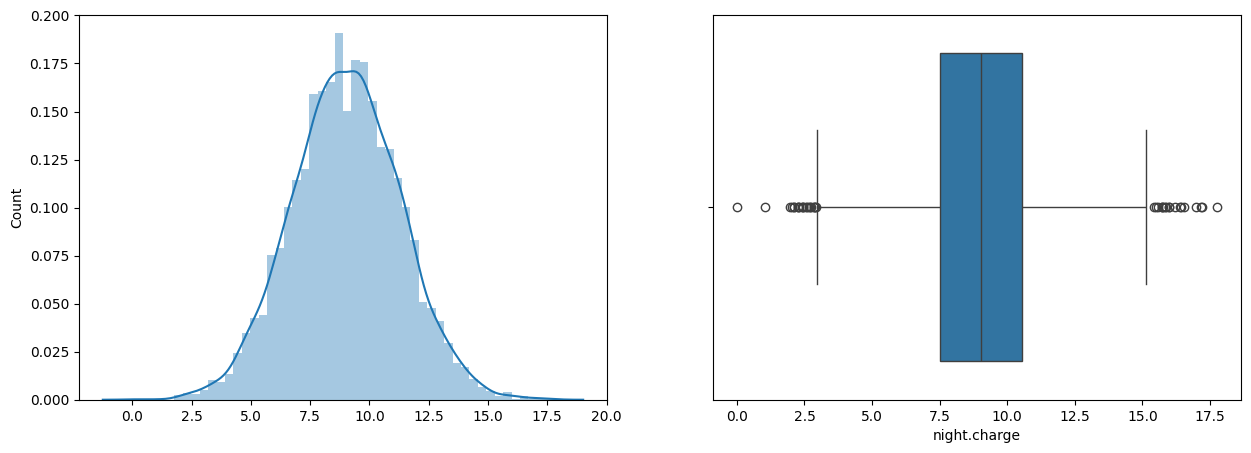

--------------

--------------

customer.calls
skew :  1.04


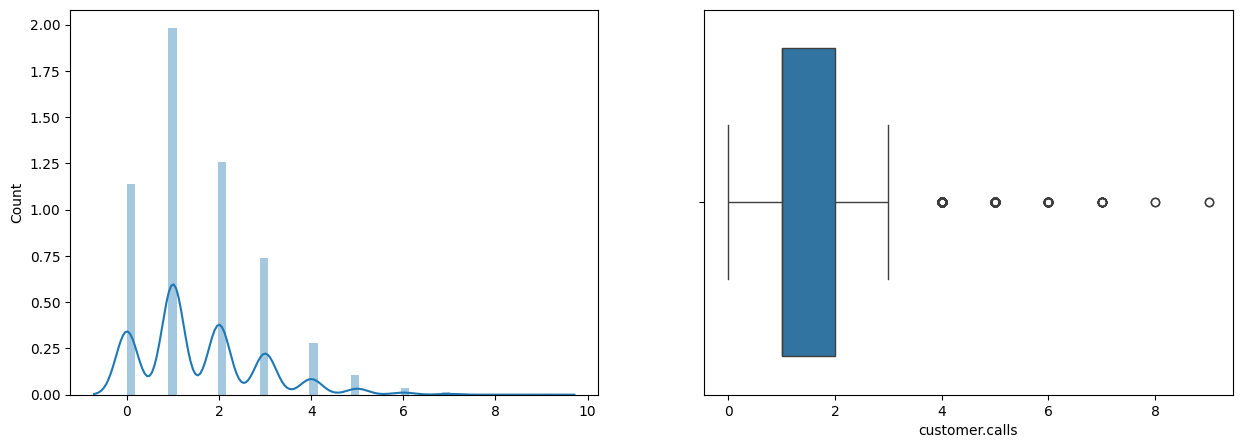

In [ ]:
for col in num_cols:
  print("--------------\n")
  print("--------------\n")
  print(col)
  print('skew : ',round(df[col].skew(),2))
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.distplot(x=df[col],hist= True)                           # Frequency Distribution
  plt.ylabel("Count")
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])                              # Five Point Summary
  plt.show()

--------------

Feature:  Unnamed: 0
Skewness:  -0.01


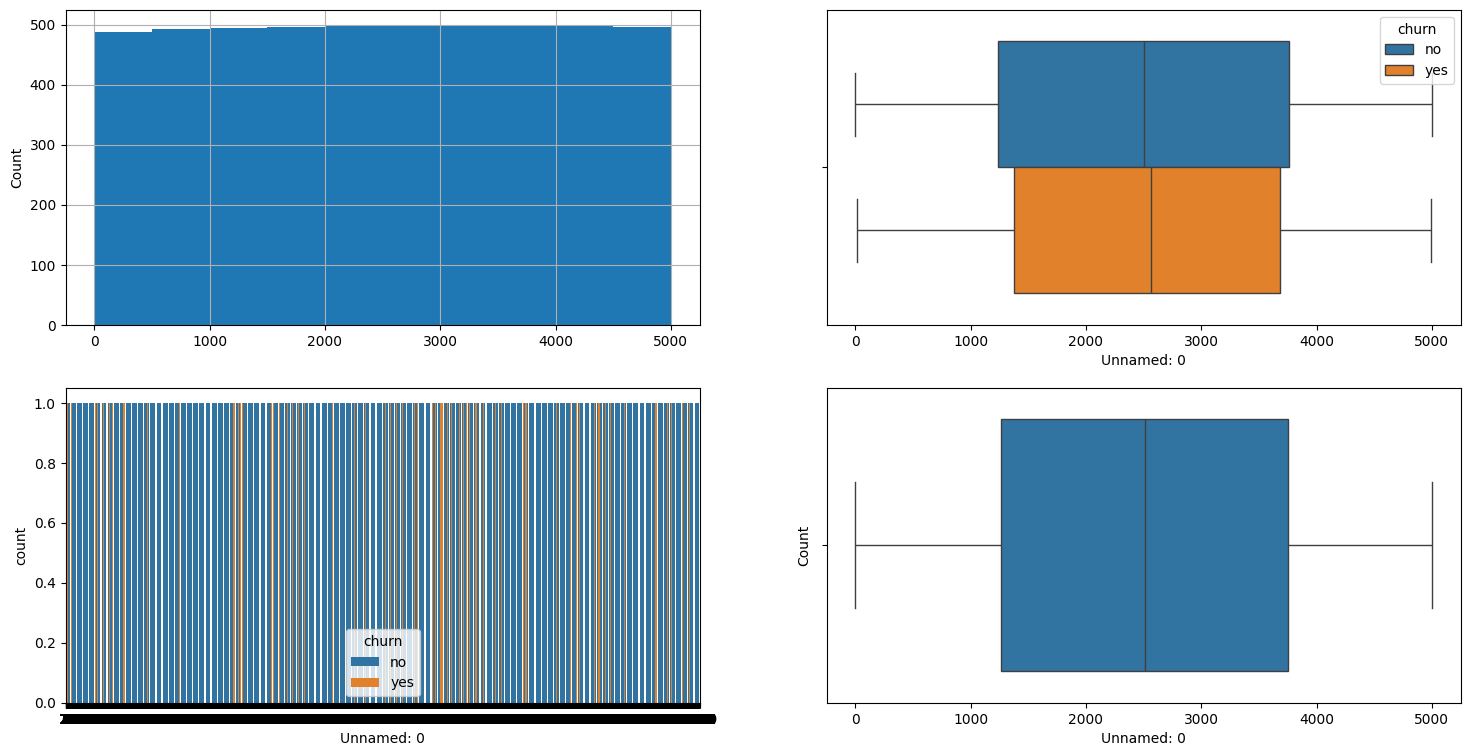

--------------

Feature:  account.length
Skewness:  0.11


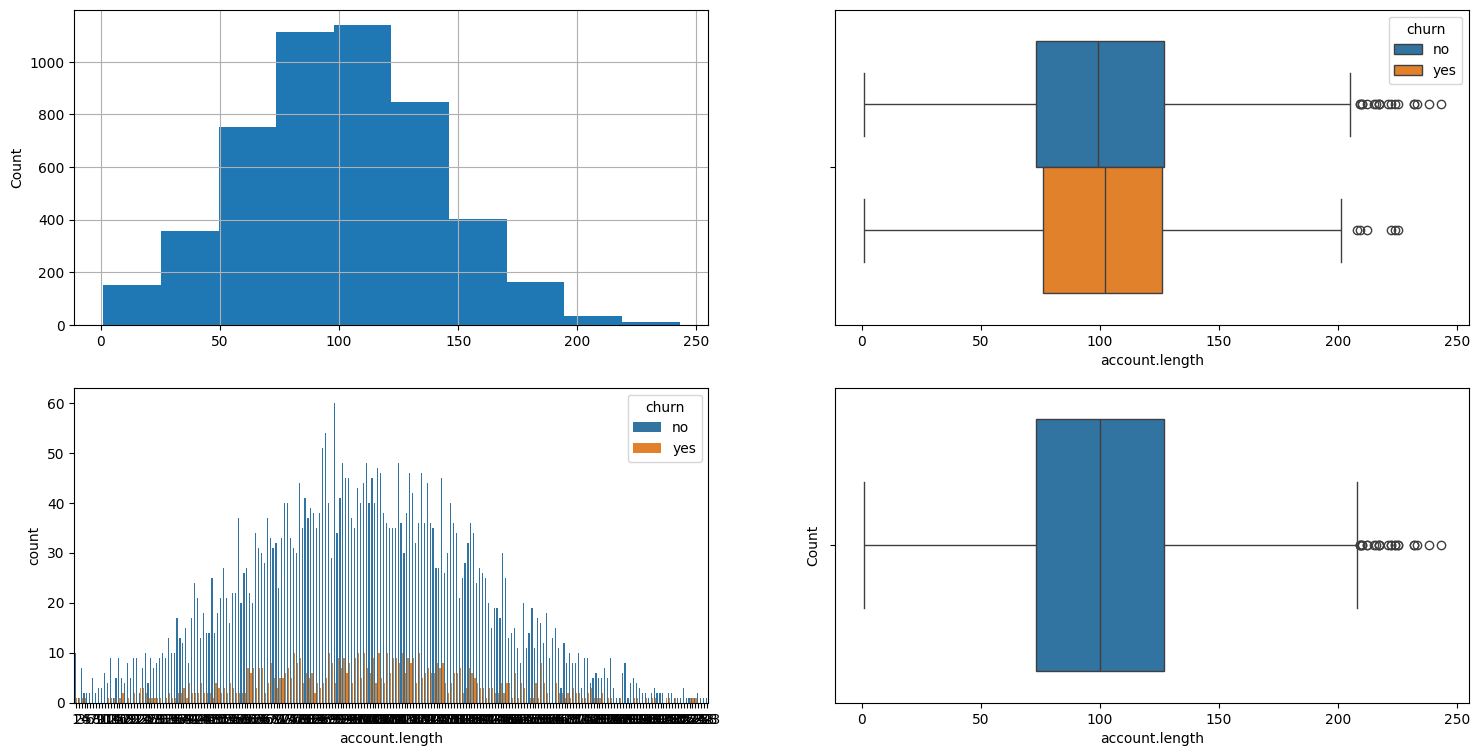

--------------

Feature:  voice.messages
Skewness:  1.35


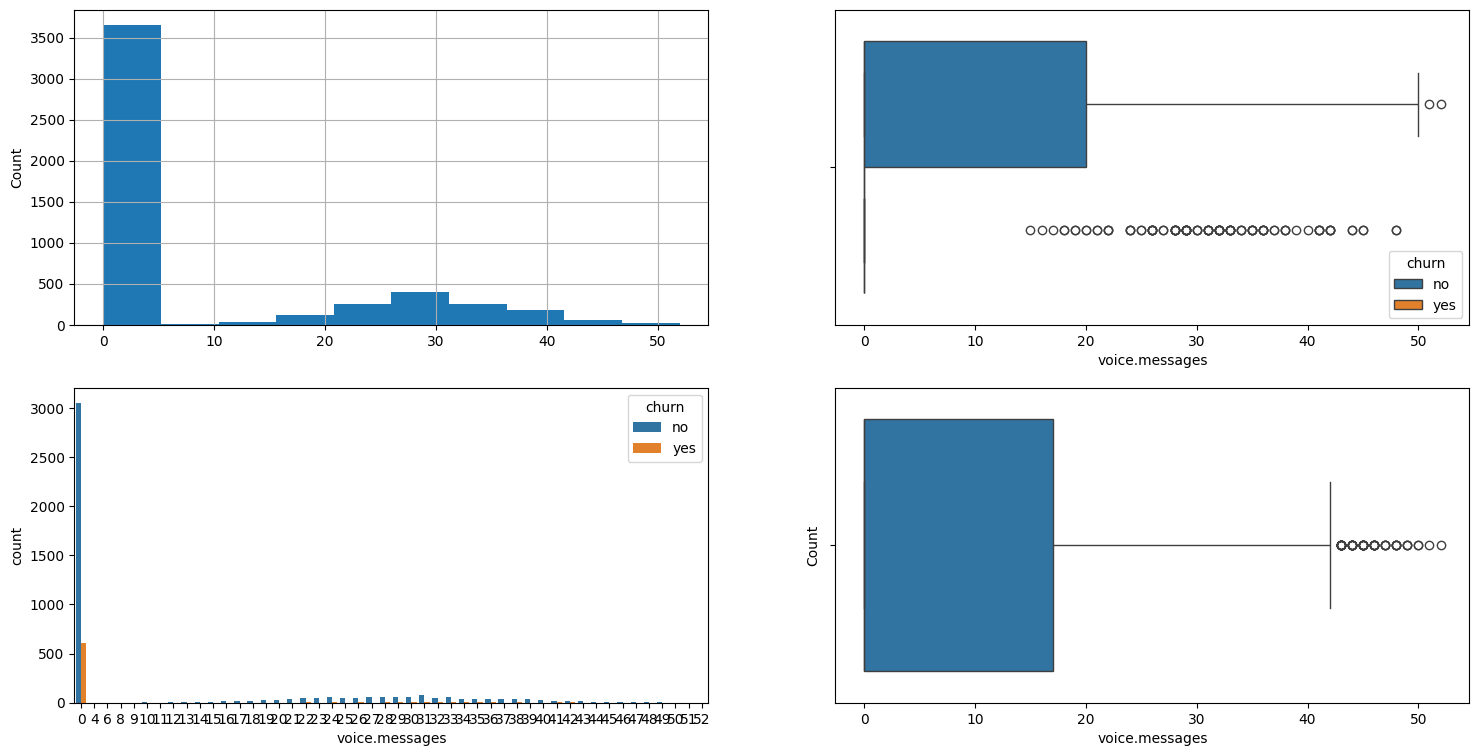

--------------

Feature:  intl.mins
Skewness:  -0.21


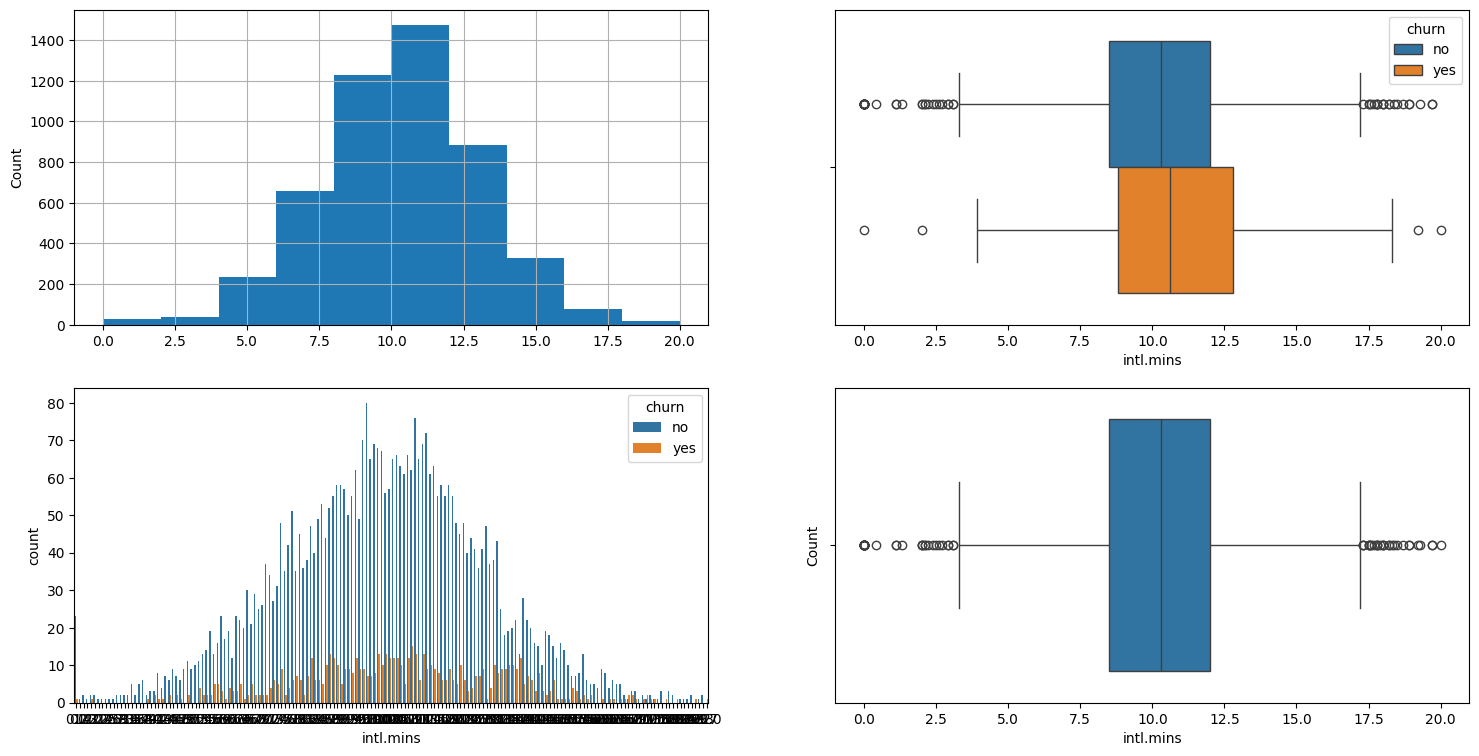

--------------

Feature:  intl.calls
Skewness:  1.36


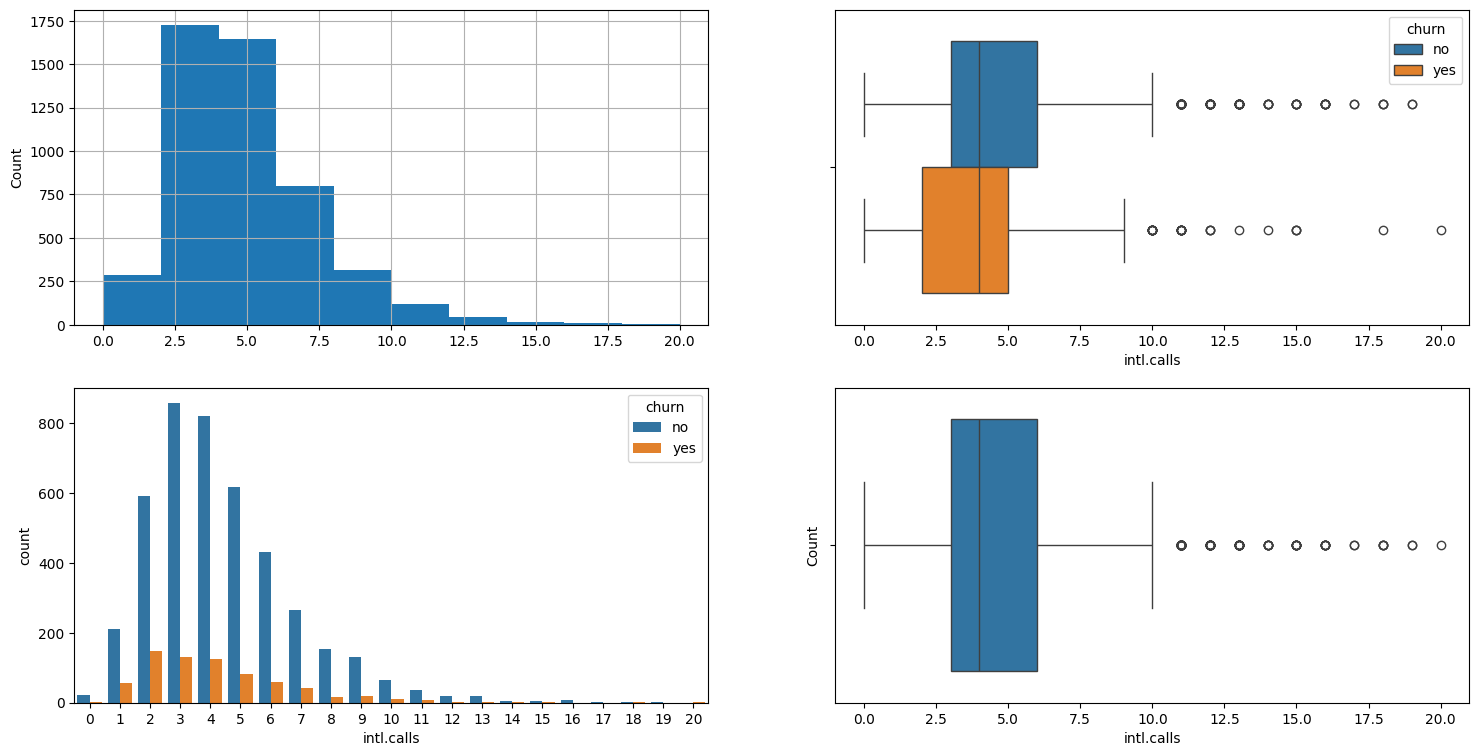

--------------

Feature:  intl.charge
Skewness:  -0.21


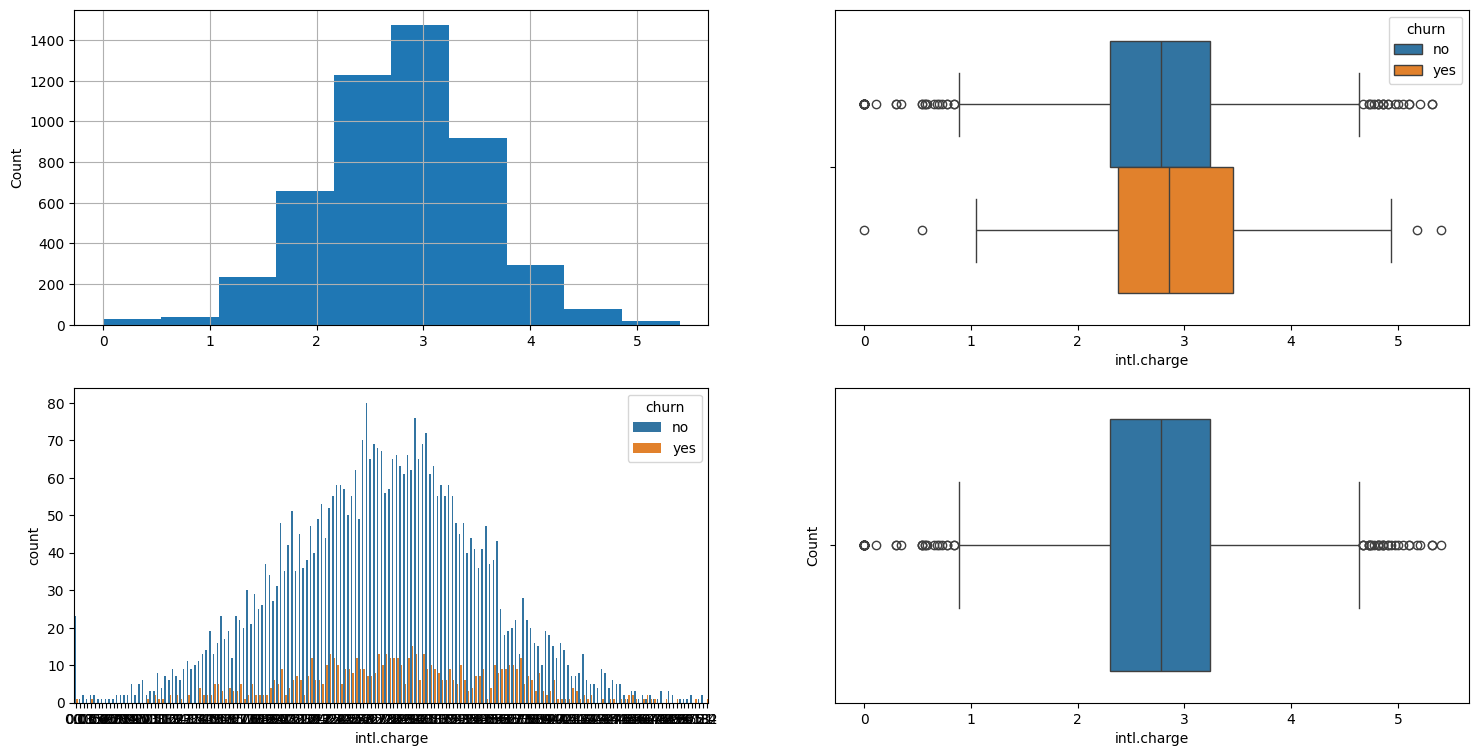

--------------

Feature:  day.mins
Skewness:  -0.01


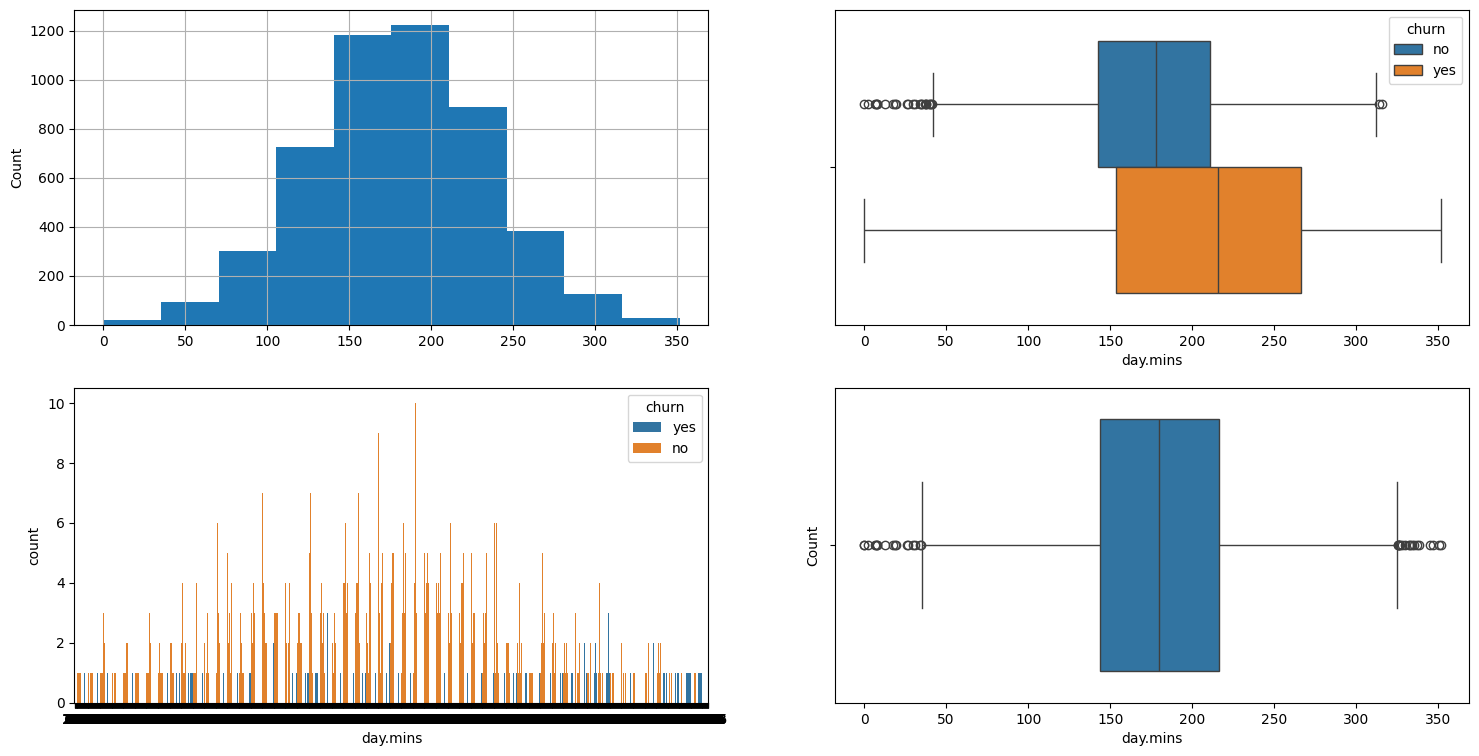

--------------

Feature:  day.calls
Skewness:  -0.09


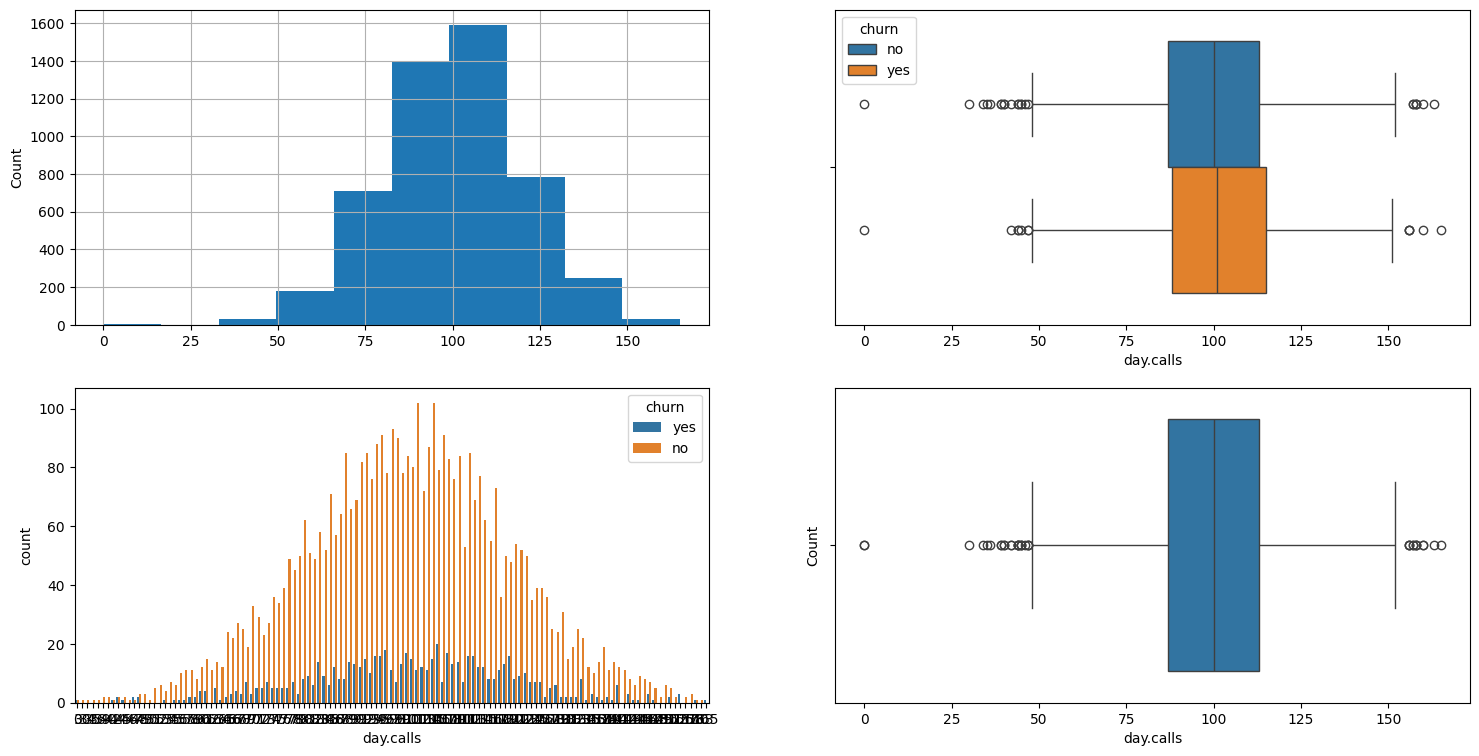

--------------

Feature:  day.charge
Skewness:  -0.01


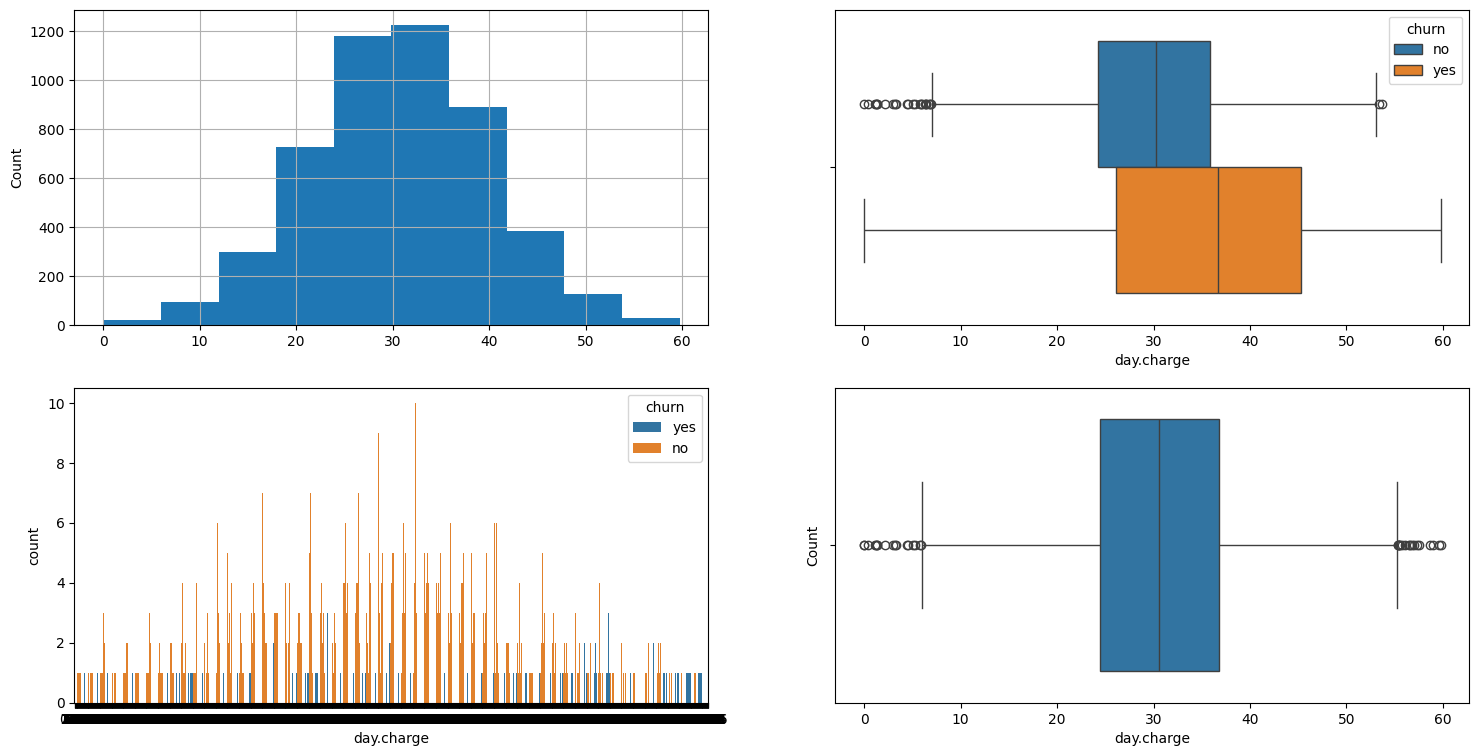

--------------

Feature:  eve.mins
Skewness:  -0.01


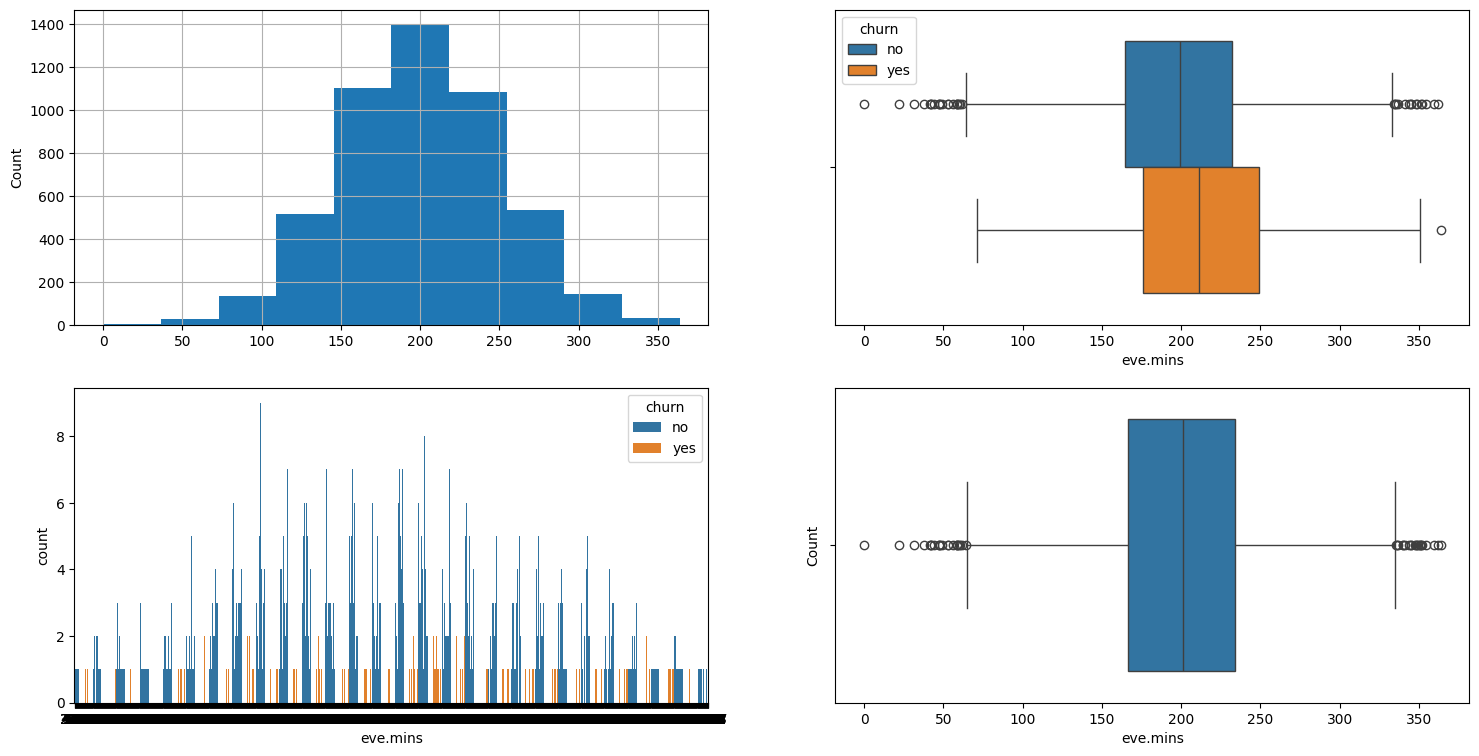

--------------

Feature:  eve.calls
Skewness:  -0.02


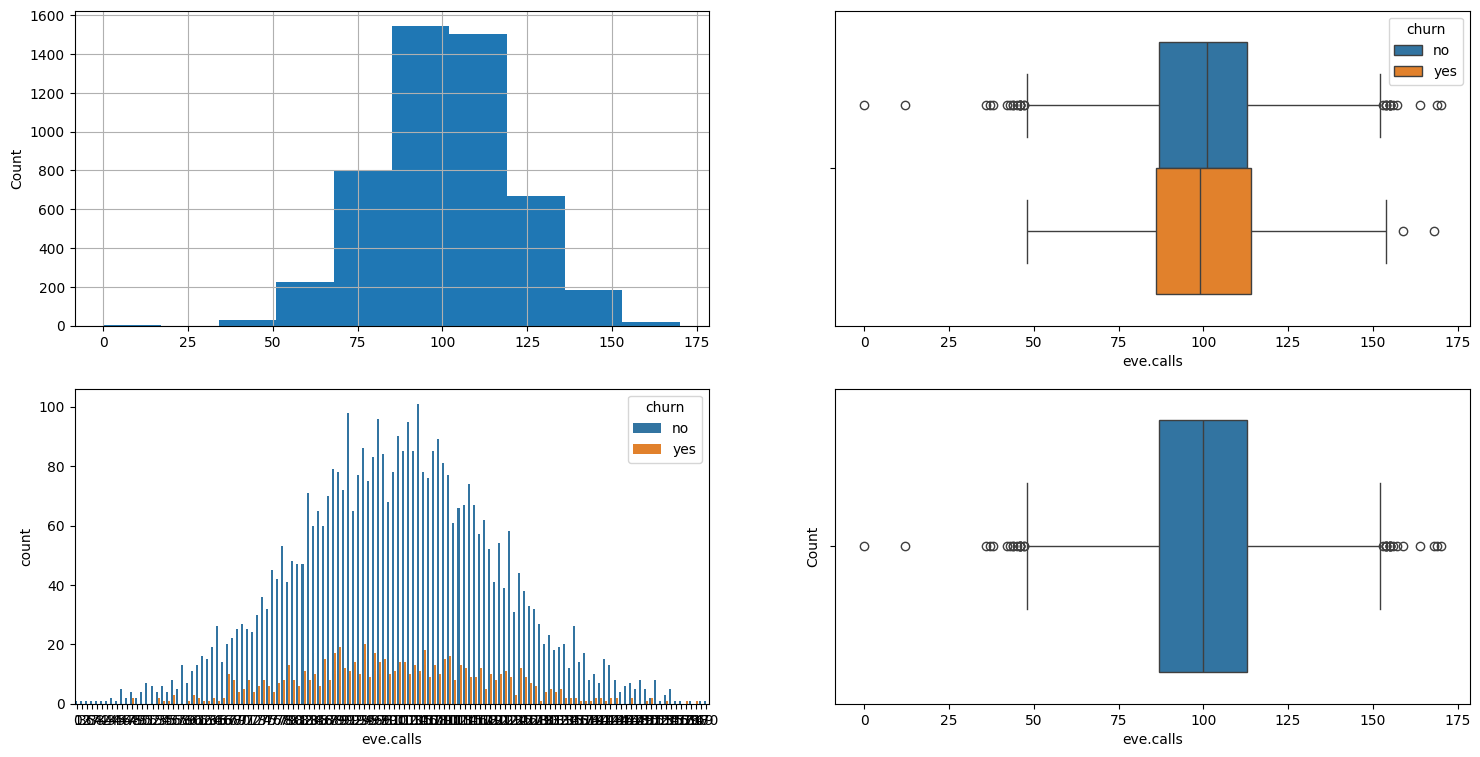

--------------

Feature:  eve.charge
Skewness:  -0.01


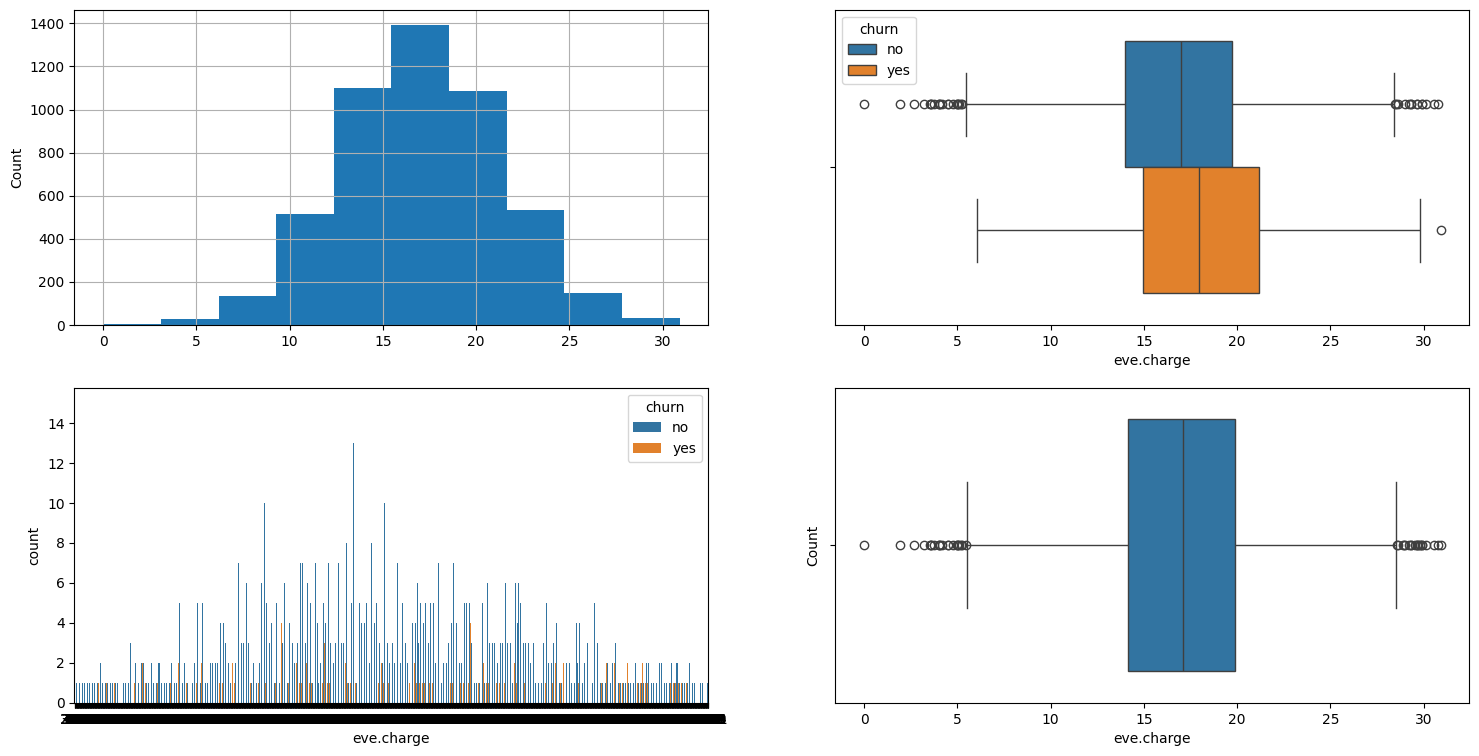

--------------

Feature:  night.mins
Skewness:  0.02


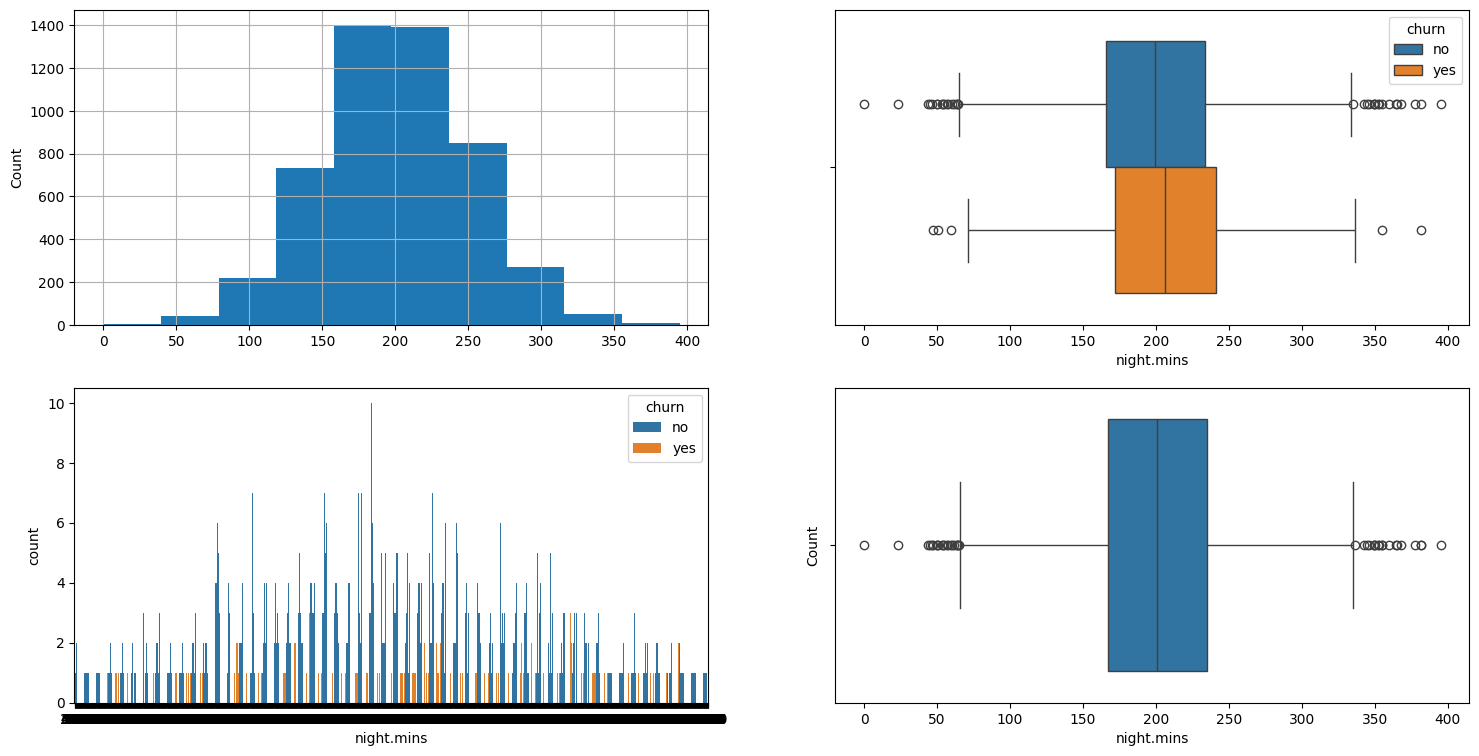

--------------

Feature:  night.calls
Skewness:  0.0


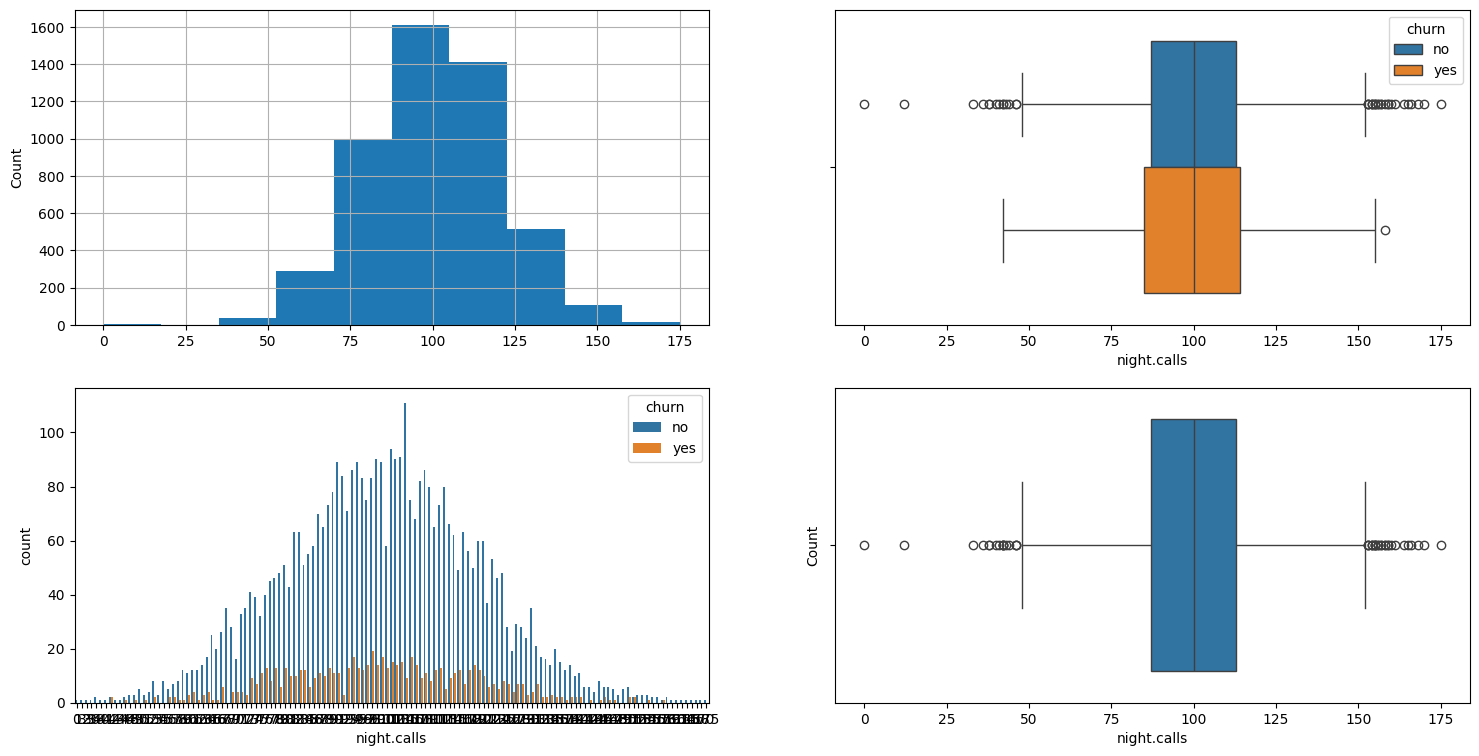

--------------

Feature:  night.charge
Skewness:  0.02


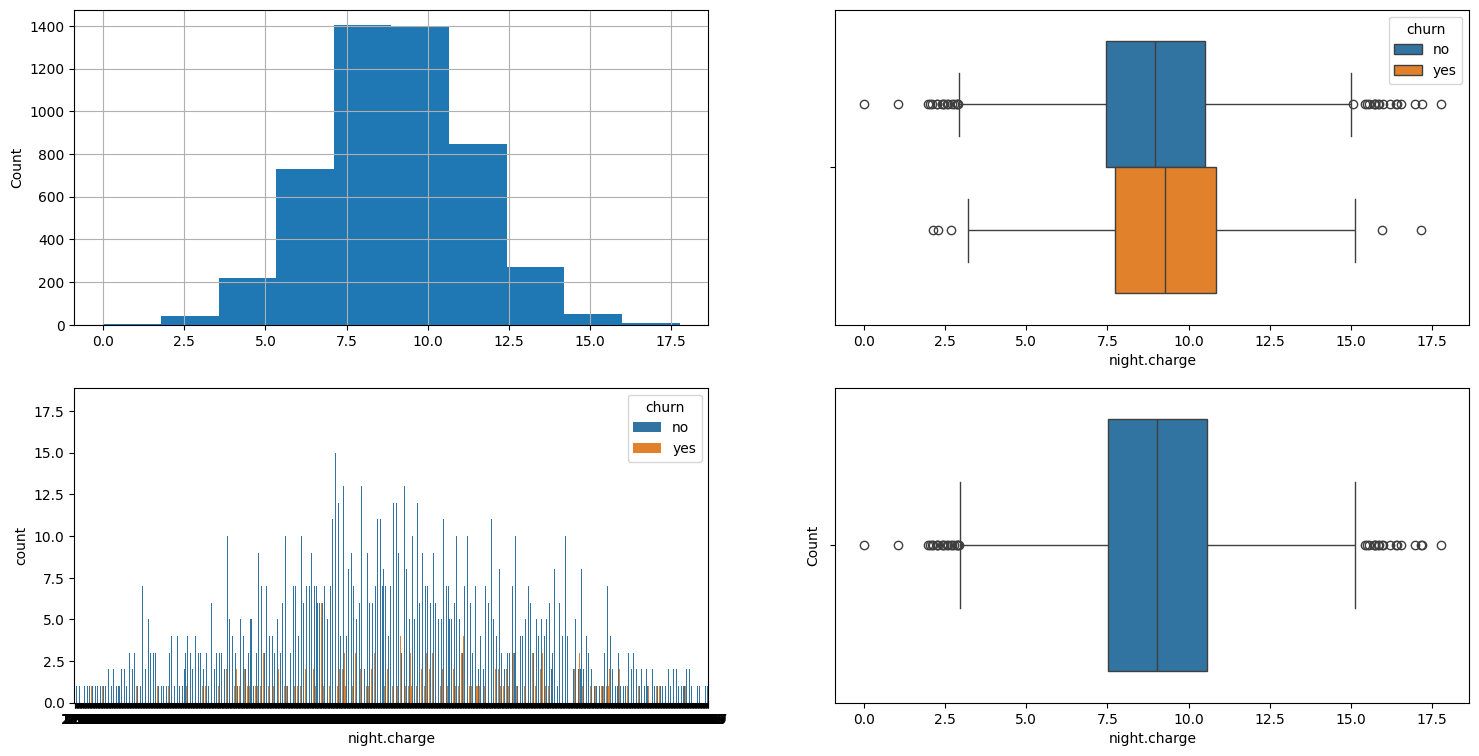

--------------

Feature:  customer.calls
Skewness:  1.04


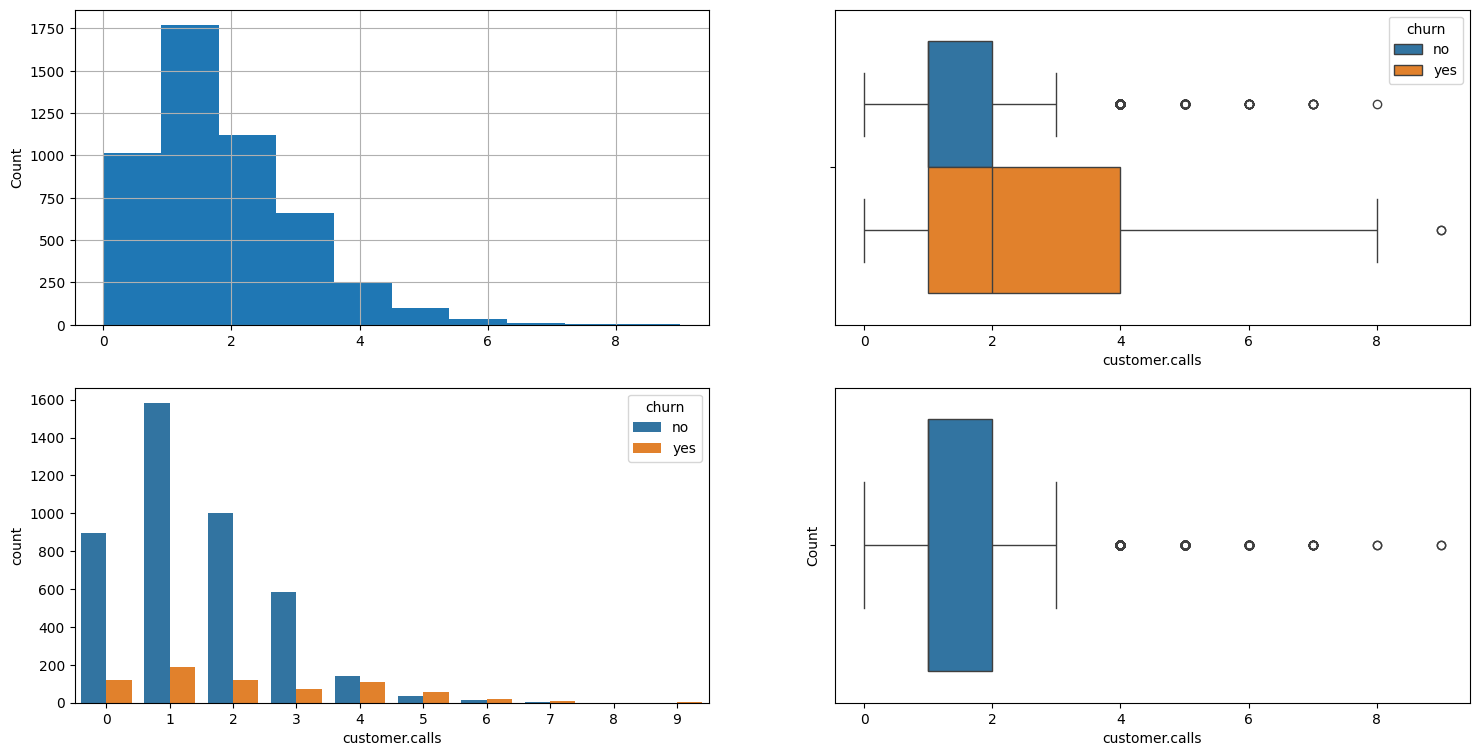

In [ ]:
for col in num_cols:
    print("--------------\n")
    print("Feature: ", col)
    print('Skewness: ', round(df[col].skew(), 2))

    plt.figure(figsize=(18, 9))

    plt.subplot(2, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel("Count")

    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x=col, hue='churn')


    plt.subplot(2, 2, 3)
    sns.countplot(data=df, x=col, hue='churn')


    plt.subplot(2,2,4)
    sns.boxplot(x=df[col])                           # Frequency Distribution
    plt.ylabel("Count")



    plt.show()

* Relation b/w "voice.plan" and "voice messages"
* At  this point , we cannot remove the outliers (availble data size )

In [ ]:
len(df[df['voice.plan']=='no'])      # Even though  Intl.plan is not active people are using Intl service unlike voice.plan

3654

In [ ]:
cat_cols,len(cat_cols)

(Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object'),
 5)

#### churn (non-loyal) customers are about 14.2 % , considering the market level of 10 percent .It is high.




####  The output is for Imbalnced data  . We might get high accuarcy  . SO dimension reductin is important fot high precision .</font>

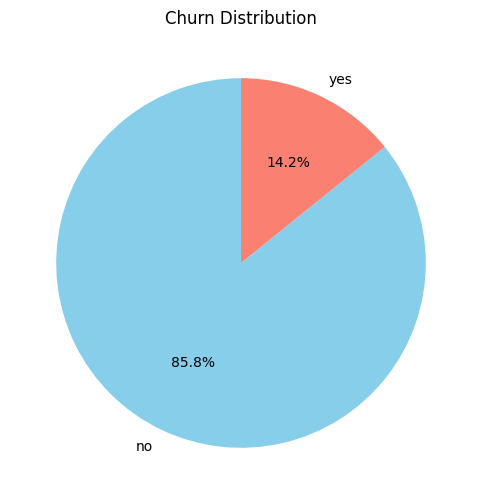

In [ ]:
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.show()

* Insights  of data transformations ??? :

In [ ]:
# Assuming 'no' means 0 and 'yes' means 1
df["churn"] = df["churn"].map({"no": 0, "yes": 1})

df["churn"] = df["churn"].astype("int64")

In [ ]:
# Assuming 'no' means 0 and 'yes' means 1
df["voice.plan"] = df["voice.plan"].map({"no": 0, "yes": 1})

df["voice.plan"] = df["voice.plan"].astype("int64")

In [ ]:
# Assuming 'no' means 0 and 'yes' means 1
df["intl.plan"] = df["intl.plan"].map({"no": 0, "yes": 1})

df["intl.plan"] = df["intl.plan"].astype("int64")

In [ ]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,4969.0,NaN,NaN,NaN,2508.523244,1439.760538,1.0,1265.0,2512.0,3754.0,5000.0
state,4969,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,4969,3,area_code_415,2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,4969.0,NaN,NaN,NaN,100.206681,39.695476,1.0,73.0,100.0,127.0,243.0
voice.plan,4969.0,NaN,NaN,NaN,0.264641,0.441186,0.0,0.0,0.0,1.0,1.0
voice.messages,4969.0,NaN,NaN,NaN,7.75488,13.545738,0.0,0.0,0.0,17.0,52.0
intl.plan,4969.0,NaN,NaN,NaN,0.094586,0.292672,0.0,0.0,0.0,0.0,1.0
intl.mins,4969.0,NaN,NaN,NaN,10.264198,2.761996,0.0,8.5,10.3,12.0,20.0
intl.calls,4969.0,NaN,NaN,NaN,4.433085,2.459495,0.0,3.0,4.0,6.0,20.0
intl.charge,4969.0,NaN,NaN,NaN,2.771851,0.745672,0.0,2.3,2.78,3.24,5.4


#### Bi-variate Analysis

#### bar plot for categorical columns vs numerical columns

In [ ]:
#bar plots ...Incoming

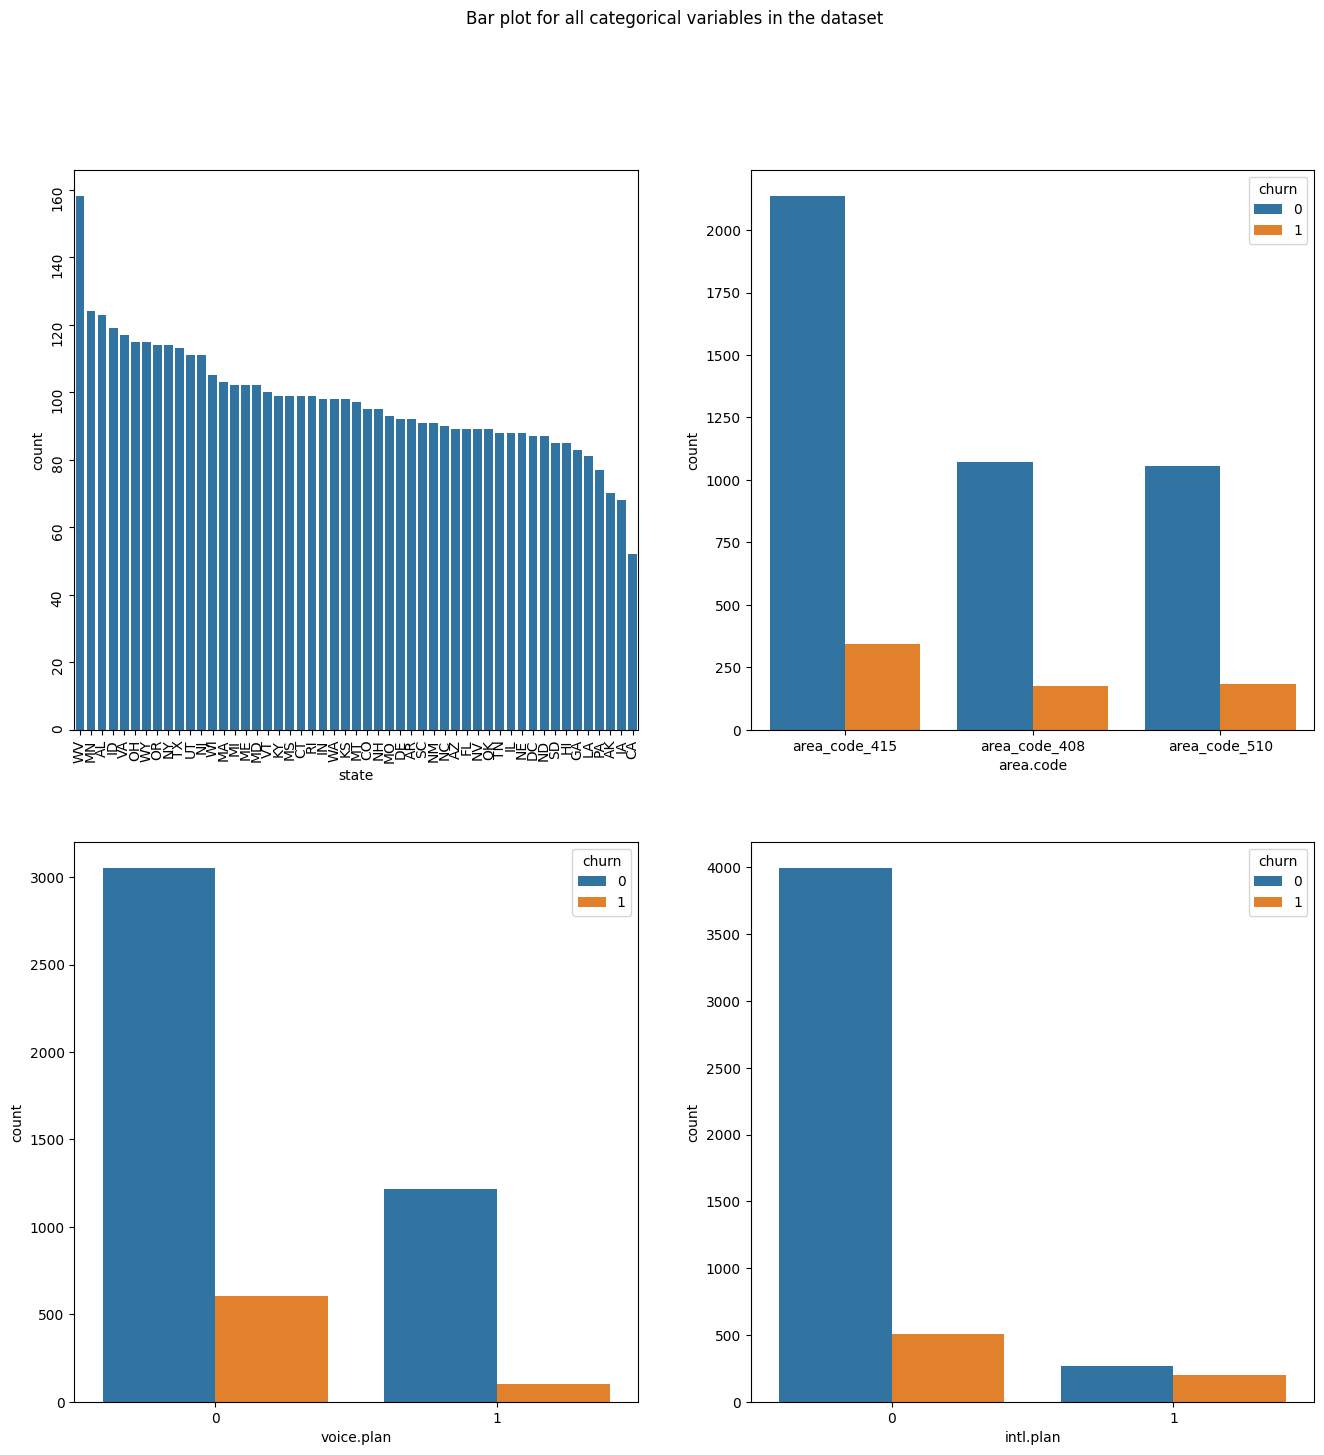

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'state', data = df,
              order = df['state'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'area.code', data = df,hue = 'churn',
              order = df['area.code'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'voice.plan', data = df,hue = 'churn',
              order = df['voice.plan'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'intl.plan', data =df,hue = 'churn',
              order = df['intl.plan'].value_counts().index);
axes[0][0].tick_params(labelrotation = 90)

 #### We are removing 'voice.plan' , as 'voice.messages' and 'voice.plan' are correlated.
 * Data Redundancy : When the voice.plan is inactive and voice.messages is zero.That creates redundancy as 0 'voice.messages' implies same as inactive 'voice.plan'.

 * Co-relation : The corr() between them is very high 0.95 .It might create a multi-collinearity and affect the model co-efficients.

* Simplicity : We are not losing the predictive power by removing the 'voice.plan' .We are simplifying the model and helping for more robust model.

In [ ]:
df[['voice.plan','voice.messages']].corr()

,voice.plan,voice.messages
voice.plan,1.000000,0.954416
voice.messages,0.954416,1.000000


In [ ]:
df[(df['voice.plan']==0) & (df['voice.messages']!=0)]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


In [ ]:
len(df[(df['voice.plan']==0) & (df['voice.messages']==0)])

3654

#### REmoving 'voice.plan'  ---

In [ ]:
df=df.drop('voice.plan',axis=1)

#### area.code  vs  state

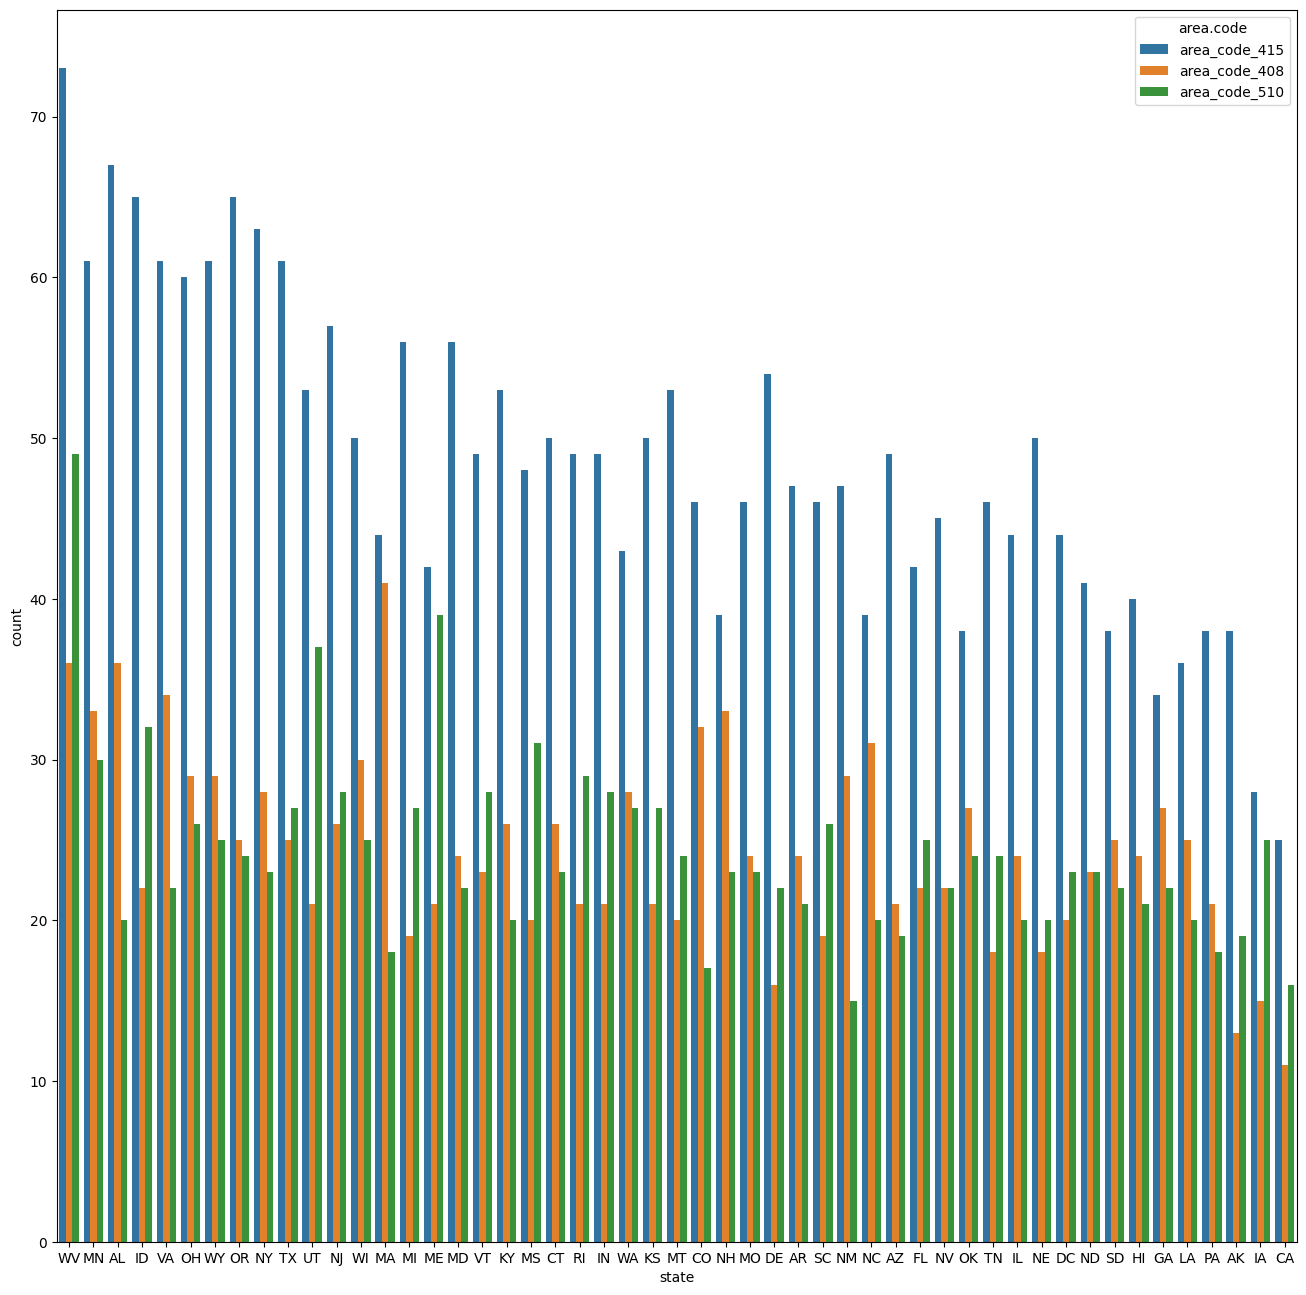

In [ ]:
plt.figure(figsize=(16,16))
sns.countplot( x = 'state', data = df,hue = 'area.code',
              order = df['state'].value_counts().index);
plt.show()

#### Attempt to see whether 'State' can be clustered into 'area.code' .It is not possible.
Since it has 51 unique values dispersed into area.code .So, we will have to careful when selecting the categorical encoding .
* NOt using  One-hot encoding label encoding
*  studying catboost encoding for this .

In [ ]:
df.nunique()

Unnamed: 0        4969
state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1957
day.calls          123
day.charge        1957
eve.mins          1875
eve.calls          126
eve.charge        1655
night.mins        1849
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

In [ ]:
df[df['state']=='KS']                    #

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
179,180,KS,area_code_408,70,0,0,0,0.0,0,0.00,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,3,0
258,259,KS,area_code_408,92,0,0,1,10.4,2,2.81,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,1,1
287,288,KS,area_code_408,137,0,0,0,14.5,4,3.92,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,2,0
368,369,KS,area_code_415,132,0,0,0,7.6,5,2.05,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4545,KS,area_code_408,39,0,0,0,12.1,2,3.27,181.2,71,30.80,344.9,108,29.32,213.6,145,9.61,3,0
4577,4578,KS,area_code_415,158,0,0,1,8.9,2,2.40,200.0,98,34.00,205.4,106,17.46,323.7,96,14.57,0,1
4739,4740,KS,area_code_415,132,0,0,0,10.2,4,2.75,164.0,112,27.88,243.6,80,20.71,155.5,122,7.00,1,0
4880,4881,KS,area_code_415,136,0,0,0,10.7,3,2.89,232.9,119,39.59,191.0,103,16.24,222.5,59,10.01,0,0


In [ ]:
pd.crosstab(df['churn'], df['intl.plan'], margins=True)

intl.plan,0,1,All
churn,,,
0,3993,271,4264
1,506,199,705
All,4499,470,4969


In [ ]:
pd.crosstab(df['churn'], df['customer.calls'], margins=True)

customer.calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,895,1584,1001,587,140,38,12,6,1,0,4264
1,121,188,122,73,111,58,22,7,1,2,705
All,1016,1772,1123,660,251,96,34,13,2,2,4969


In [ ]:
pd.crosstab(df['customer.calls'],df['churn'],margins = True)

churn,0,1,All
customer.calls,,,
0,895,121,1016
1,1584,188,1772
2,1001,122,1123
3,587,73,660
4,140,111,251
5,38,58,96
6,12,22,34
7,6,7,13
8,1,1,2


# Multi Variete Analysis

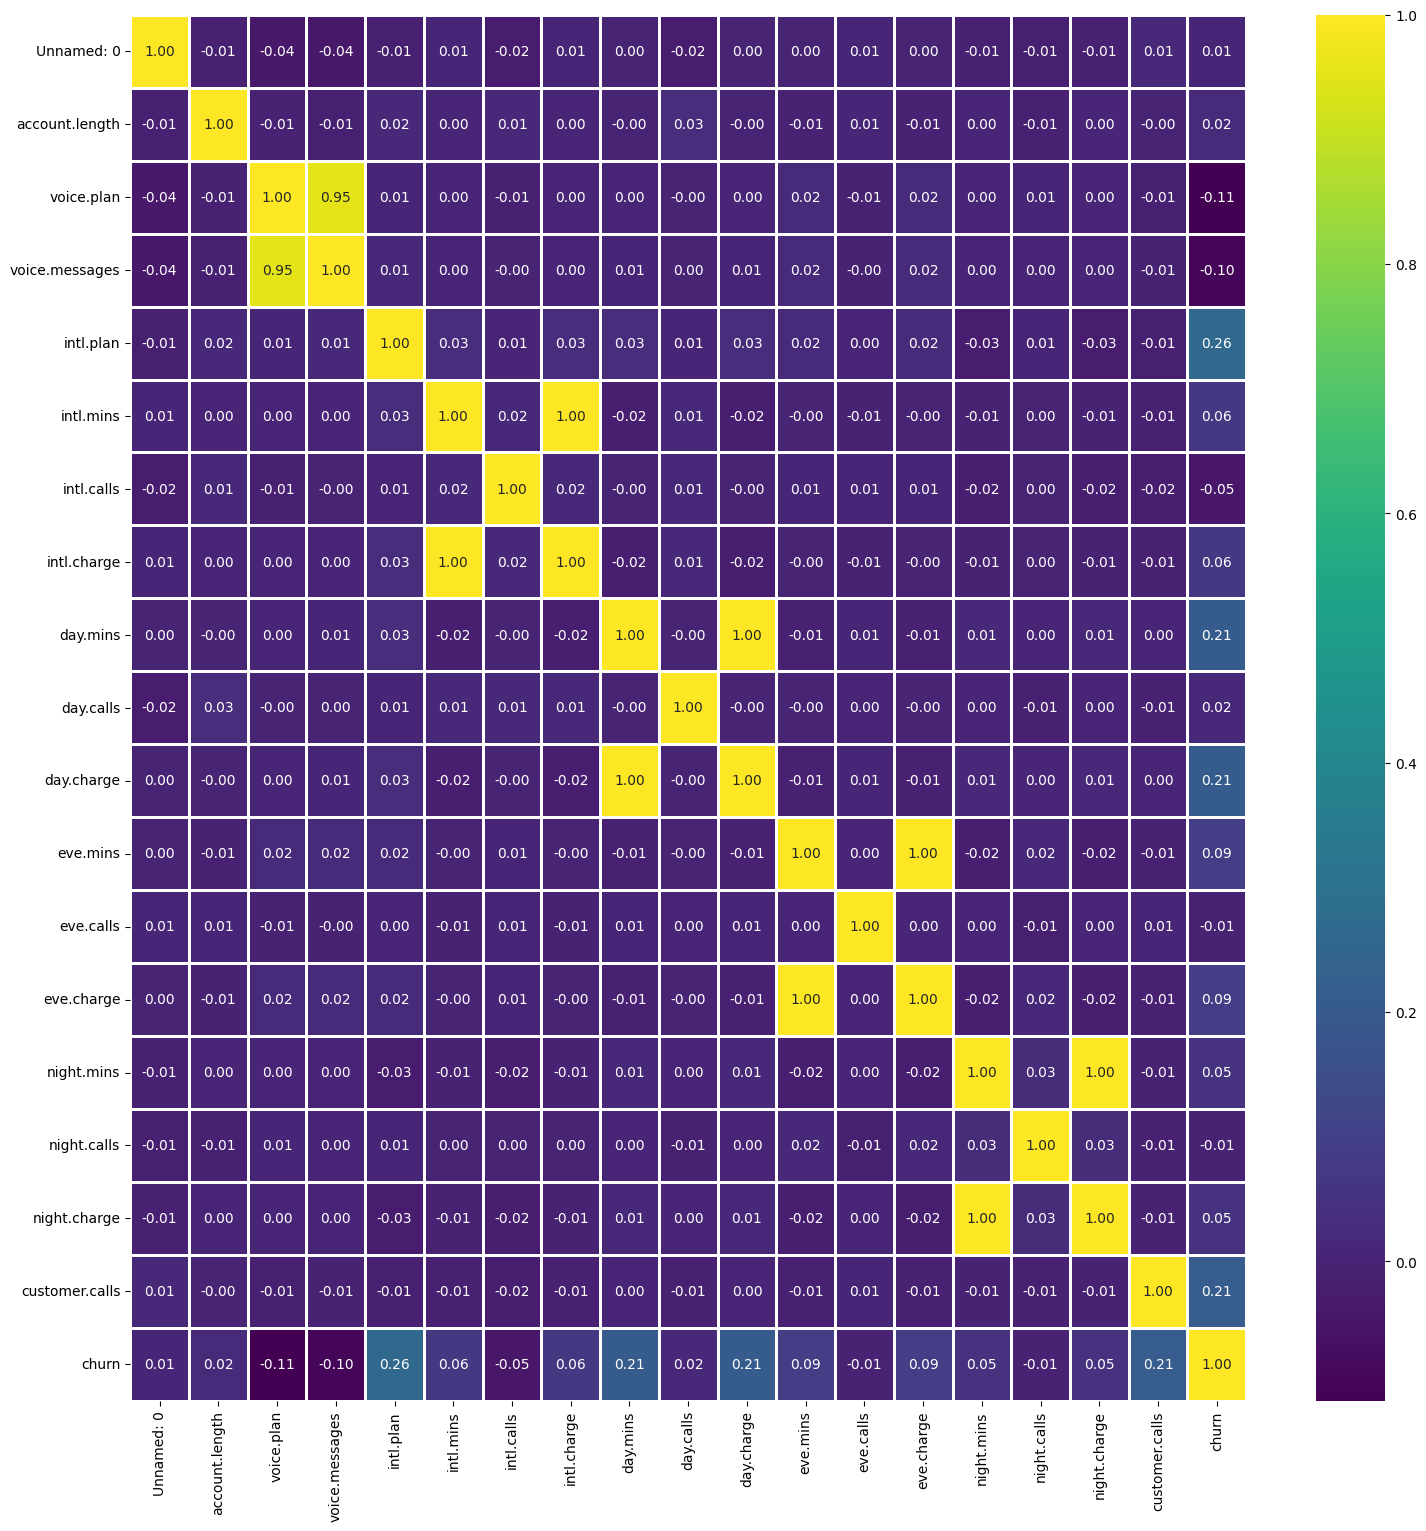

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.drop(['state','area.code'],axis =1).corr(), annot = True, fmt='.2f', cmap='viridis', linewidths=2 )
plt.show()

# * day charge - day.mins , eve.charge -eve.mins , night.charge -night.mins , intl.charge -intl.mins , voice.plan - voice.messages    foo <font color='red'> -- Insights -->Feature Engineering....Incoming
</font> foo

#### Feature Engineering

#### DATA REDUCTION : The "Unnamed: 0" had been removed as it is irrelevant Beacuse *** It does not have the predictive power and for predicting the churn ***

In [ ]:
df =df.drop(['Unnamed: 0'],axis =1 )

#### We are merging day.charge and day.mins into one column as  "day.chargePERmin" similarly for intl.chargepermin ,eve.chargepermin , ngt.chargepermin  .

Charge per min  denotes  day.charge/day.min  because of their absolute dependency .from correlation table .

In [ ]:
df['day.chargepermin'] =df['day.charge']/df['day.mins']

In [ ]:
df['eve.chargepermin'] =df['eve.charge']/df['eve.mins']

In [ ]:
df['night.chargepermin'] =df['night.charge']/df['night.mins']

In [ ]:
df['intl.chargepermin'] =df['intl.charge']/df['intl.mins']

In [ ]:
# Assuming 'df' is your DataFrame
columns_to_drop = ["eve.mins", "eve.charge", "day.charge", "day.mins", "night.charge", "night.mins", "intl.charge", "intl.mins"]

# Drop the specified columns
df_filtered = df.drop(columns_to_drop, axis=1)

# Generate descriptive statistics for the remaining columns
df_filtered.describe().T



,count,mean,std,min,25%,50%,75%,max
account.length,4969.0,100.206681,39.695476,1.000000,73.000000,100.000000,127.000000,243.000000
voice.messages,4969.0,7.754880,13.545738,0.000000,0.000000,0.000000,17.000000,52.000000
intl.plan,4969.0,0.094586,0.292672,0.000000,0.000000,0.000000,0.000000,1.000000
intl.calls,4969.0,4.433085,2.459495,0.000000,3.000000,4.000000,6.000000,20.000000
day.calls,4969.0,100.021936,19.835965,0.000000,87.000000,100.000000,113.000000,165.000000
eve.calls,4969.0,100.174884,19.833572,0.000000,87.000000,100.000000,113.000000,170.000000
night.calls,4969.0,99.954518,19.959015,0.000000,87.000000,100.000000,113.000000,175.000000
customer.calls,4969.0,1.571946,1.307458,0.000000,1.000000,1.000000,2.000000,9.000000
churn,4969.0,0.141880,0.348962,0.000000,0.000000,0.000000,0.000000,1.000000
day.chargepermin,4967.0,0.170003,0.000027,0.169231,0.169989,0.170004,0.170017,0.170513


In [ ]:
df_filtered

,state,area.code,account.length,voice.messages,intl.plan,intl.calls,day.calls,eve.calls,night.calls,customer.calls,churn,day.chargepermin,eve.chargepermin,night.chargepermin,intl.chargepermin
0,KS,area_code_415,128,25,0,3,110,99,91,1,0,0.170011,0.085005,0.044994,0.270000
1,OH,area_code_415,107,26,0,3,123,103,103,1,0,0.169988,0.085013,0.045008,0.270073
2,NJ,area_code_415,137,0,0,5,114,110,104,0,0,0.170008,0.084983,0.045018,0.269672
3,OH,area_code_408,84,0,1,7,71,88,89,2,0,0.170007,0.084976,0.044997,0.269697
4,OK,area_code_415,75,0,1,3,113,122,121,3,0,0.170006,0.085030,0.044997,0.270297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,40,0,5,127,126,116,2,0,0.170004,0.085022,0.045008,0.269697
4996,WV,area_code_415,152,0,0,2,90,73,113,3,1,0.169978,0.085008,0.044991,0.270068
4997,DC,area_code_415,61,0,0,4,89,128,97,1,0,0.169986,0.085012,0.045009,0.269853
4998,DC,area_code_510,109,0,0,6,67,92,89,0,0,0.170021,0.084974,0.045009,0.270588


Binning

In [ ]:
from random import randint
df_ages = pd.DataFrame({"age" :[randint(20,55) for x in range(8)]})
df_ages["age_bins"] = pd.cut(x=df_ages["age"],bins=[20,29,39,49,59])
df_ages["ages_by_decade"]=pd.cut(x=df_ages["age"],bins = [20,29,39,49,59],labels= ['20s','30s','40s','50s'])
df_ages

,age,age_bins,ages_by_decade
0,30,"(29, 39]",30s
1,45,"(39, 49]",40s
2,33,"(29, 39]",30s
3,27,"(20, 29]",20s
4,27,"(20, 29]",20s
5,39,"(29, 39]",30s
6,27,"(20, 29]",20s
7,51,"(49, 59]",50s
